In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True)  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']]  # Keep relevant columns

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned['Date'] = pd.to_datetime(csv_cleaned['Date'], dayfirst=True)  # Convert Date to datetime
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# PM2.5 levels on primary y-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# LST on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('PM2.5 Levels and LST Over Time')
fig.tight_layout()
plt.show()
 


ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True)  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']]  # Keep relevant columns

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned['Date'] = pd.to_datetime(csv_cleaned['Date'], dayfirst=True)  # Convert Date to datetime
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# PM2.5 levels on primary y-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# LST on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('PM2.5 Levels and LST Over Time')
fig.tight_layout()
plt.show()


ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

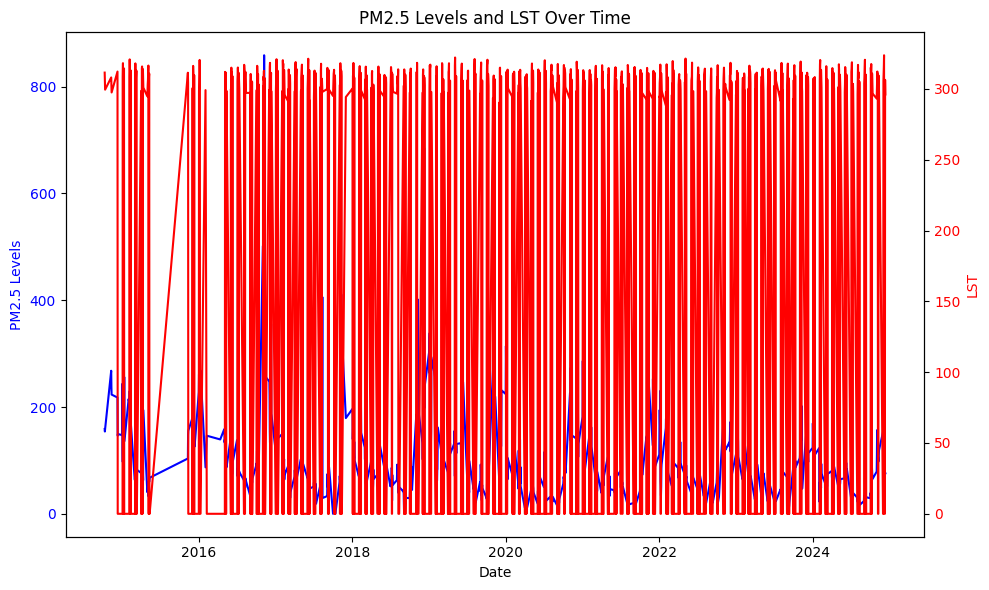

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# PM2.5 levels on primary y-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# LST on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('PM2.5 Levels and LST Over Time')
fig.tight_layout()
plt.show()


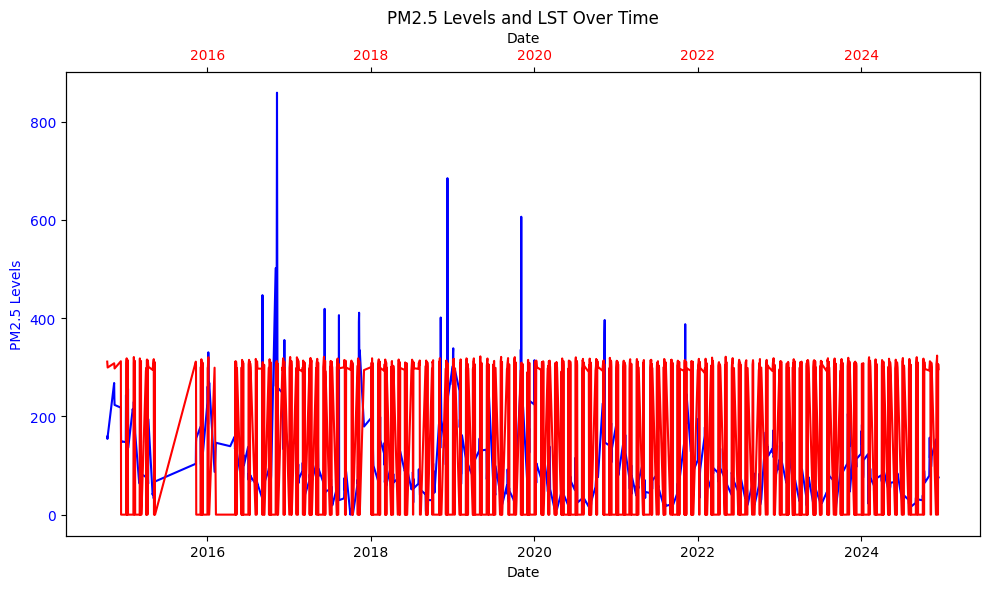

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels on the upper side of the x-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis at the bottom to plot LST
ax2 = ax1.twiny()  # Secondary x-axis
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_xlabel('Date')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Title and layout
plt.title('PM2.5 Levels and LST Over Time')
fig.tight_layout()
plt.show()


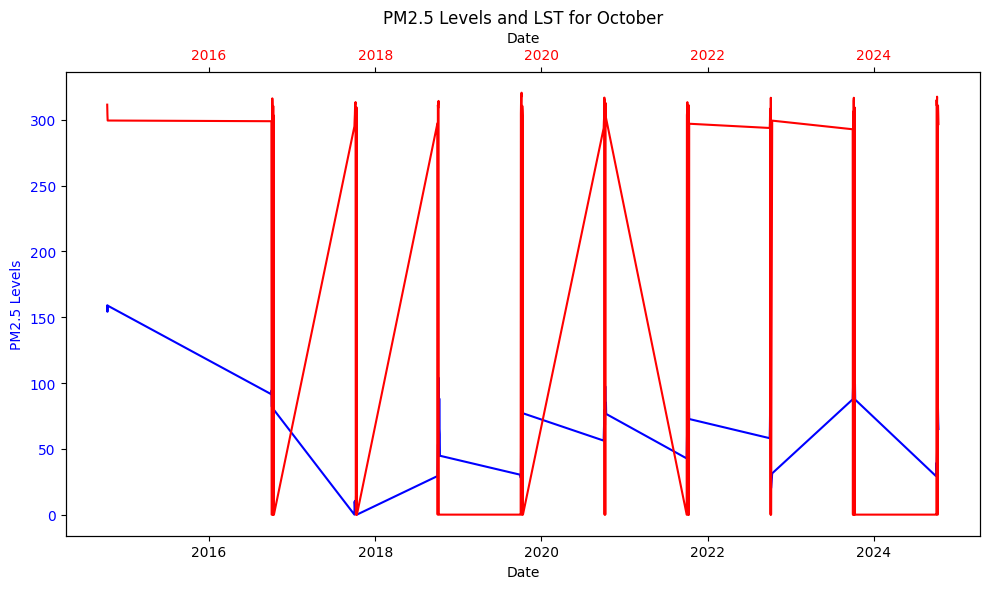

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data
pm25_cleaned = pm25_cleaned[pm25_cleaned['Date'].dt.month == 10]
csv_cleaned = csv_cleaned[csv_cleaned['Date'].dt.month == 10]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels on the upper side of the x-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis at the bottom to plot LST
ax2 = ax1.twiny()  # Secondary x-axis
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_xlabel('Date')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Title and layout
plt.title('PM2.5 Levels and LST for October')
fig.tight_layout()
plt.show()


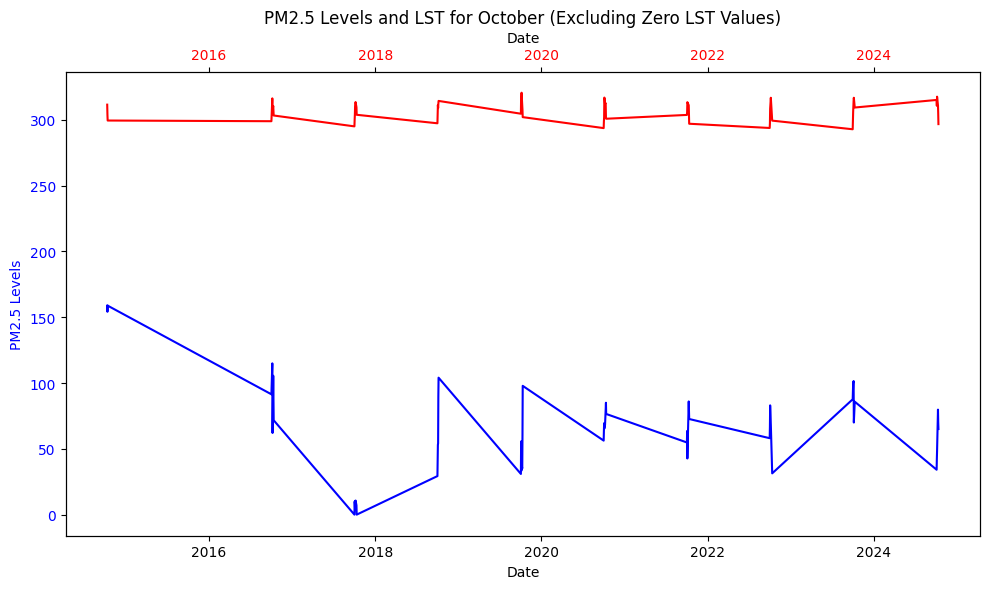

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data
pm25_cleaned = pm25_cleaned[pm25_cleaned['Date'].dt.month == 10]
csv_cleaned = csv_cleaned[csv_cleaned['Date'].dt.month == 10]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels on the upper side of the x-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis at the bottom to plot LST
ax2 = ax1.twiny()  # Secondary x-axis
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_xlabel('Date')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Title and layout
plt.title('PM2.5 Levels and LST for October (Excluding Zero LST Values)')
fig.tight_layout()
plt.show()


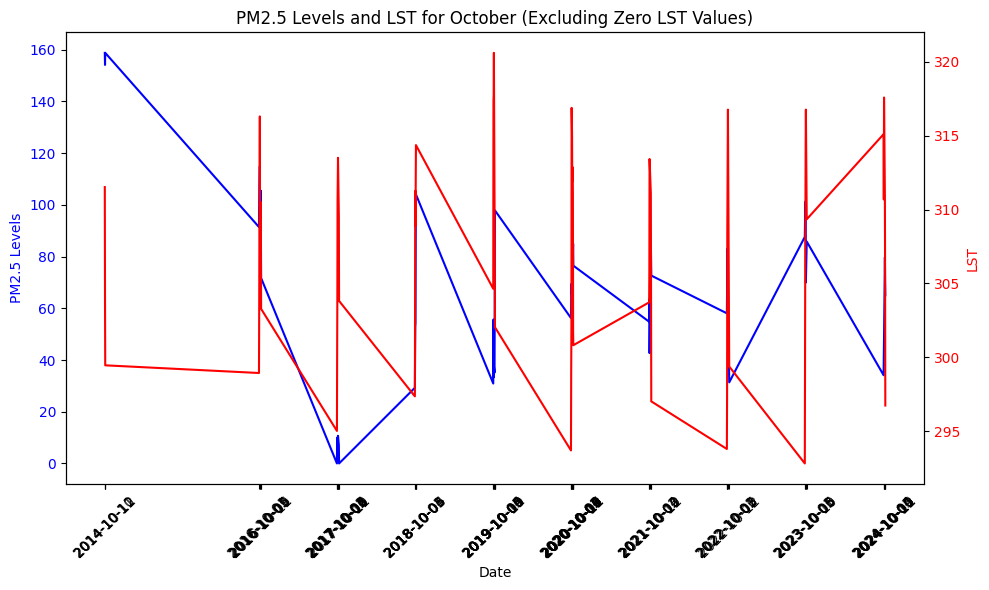

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10)
pm25_cleaned = pm25_cleaned[pm25_cleaned['Date'].dt.month == 10]
csv_cleaned = csv_cleaned[csv_cleaned['Date'].dt.month == 10]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels on the primary y-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis to plot LST
ax2 = ax1.twinx()  # Secondary y-axis
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis to show only dates from October
ax1.set_xticks(merged_data['Date'])  # Ensure x-ticks correspond to only October dates
ax1.set_xticklabels(merged_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45)  # Format and rotate date labels for clarity

# Title and layout
plt.title('PM2.5 Levels and LST for October (Excluding Zero LST Values)')
fig.tight_layout()
plt.show()


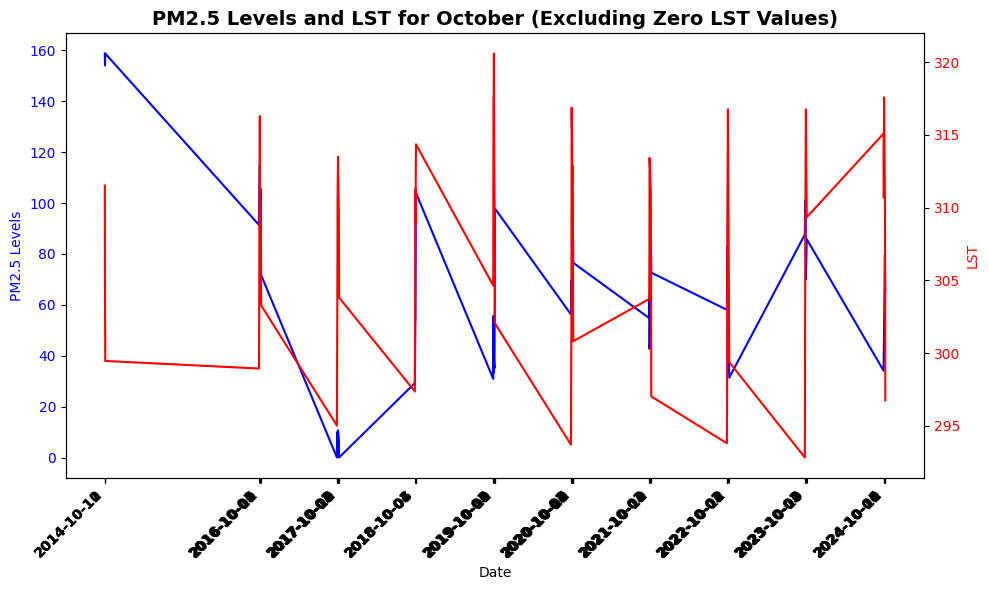

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10)
pm25_cleaned = pm25_cleaned[pm25_cleaned['Date'].dt.month == 10]
csv_cleaned = csv_cleaned[csv_cleaned['Date'].dt.month == 10]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 levels on the primary y-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis to plot LST
ax2 = ax1.twinx()  # Secondary y-axis
ax2.plot(merged_data['Date'], merged_data['LST'], color='red', label='LST')
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis to show only dates from October
ax1.set_xticks(merged_data['Date'])  # Ensure x-ticks correspond to only October dates
ax1.set_xticklabels(merged_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=10, fontweight='bold')  # Format and rotate date labels

# Title and layout
plt.title('PM2.5 Levels and LST for October (Excluding Zero LST Values)', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()


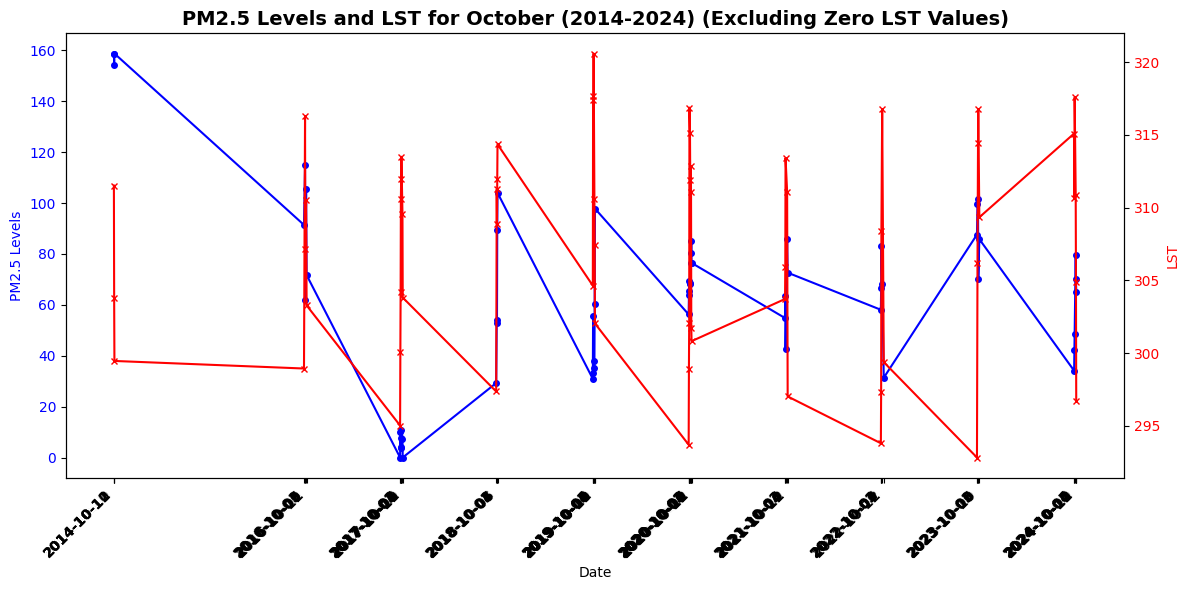

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PM2.5 levels on the primary y-axis
ax1.plot(merged_data['Date'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5 Levels', markersize=4)
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis to plot LST
ax2 = ax1.twinx()  # Secondary y-axis
ax2.plot(merged_data['Date'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
ax2.set_ylabel('LST', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis to show only dates from October across all years
ax1.set_xticks(merged_data['Date'])  # Ensure x-ticks correspond to only October dates
ax1.set_xticklabels(merged_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=10, fontweight='bold')  # Format and rotate date labels

# Title and layout
plt.title('PM2.5 Levels and LST for October (2014-2024) (Excluding Zero LST Values)', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()


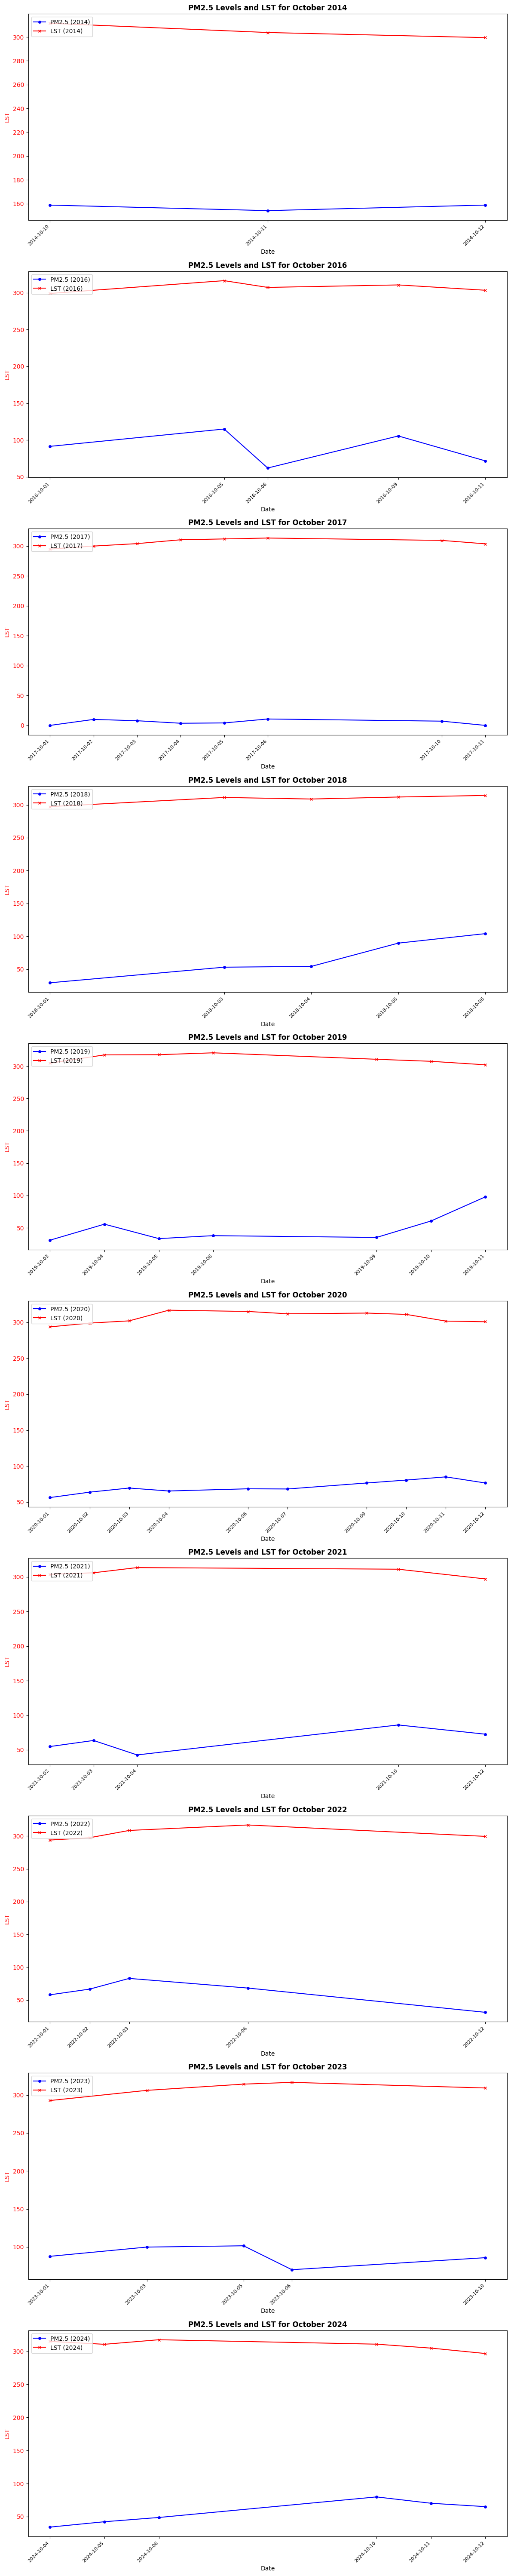

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create a list of unique years from the data (2014-2024)
years = merged_data['Date'].dt.year.unique()

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data[merged_data['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Set x-axis to show only dates for that year
    axs[i].set_xticks(year_data['Date'])
    axs[i].set_xticklabels(year_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Ensure data contains all 31 days of October for each year
october_dates = pd.date_range(start="2014-10-01", end="2024-10-31", freq='D')

# Initialize empty DataFrame for merged data with all 31 days
merged_data_all_days = pd.DataFrame()

for year in range(2014, 2025):
    # Filter for October of a specific year
    pm25_year = pm25_cleaned[pm25_cleaned['Date'].dt.year == year]
    csv_year = csv_cleaned[csv_cleaned['Date'].dt.year == year]

    # Reindex to ensure all 31 days are present, filling missing data with NaN
    pm25_year = pm25_year.set_index('Date').reindex(october_dates[october_dates.dt.year == year]).reset_index()
    csv_year = csv_year.set_index('Date').reindex(october_dates[october_dates.dt.year == year]).reset_index()

    # Merge the data for the current year
    merged_year = pd.merge(pm25_year, csv_year, left_on='index', right_on='index', how='outer').drop(columns=['index'])
    merged_data_all_days = pd.concat([merged_data_all_days, merged_year])

# Merge datasets for all years
merged_data_all_days.rename(columns={'index': 'Date'}, inplace=True)

# Create a list of unique years from the data (2014-2024)
years = merged_data_all_days['Date'].dt.year.unique()

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data_all_days[merged_data_all_days['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Set x-axis to show only dates for that year
    axs[i].set_xticks(year_data['Date'])
    axs[i].set_xticklabels(year_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Ensure data contains all 31 days of October for each year
october_dates = pd.date_range(start="2014-10-01", end="2024-10-31", freq='D')

# Initialize empty DataFrame for merged data with all 31 days
merged_data_all_days = pd.DataFrame()

for year in range(2014, 2025):
    # Filter for October of a specific year
    pm25_year = pm25_cleaned[pm25_cleaned['Date'].dt.year == year]
    csv_year = csv_cleaned[csv_cleaned['Date'].dt.year == year]

    # Reindex to ensure all 31 days are present, filling missing data with NaN
    pm25_year = pm25_year.set_index('Date').reindex(october_dates[october_dates.year == year]).reset_index()
    csv_year = csv_year.set_index('Date').reindex(october_dates[october_dates.year == year]).reset_index()

    # Merge the data for the current year
    merged_year = pd.merge(pm25_year, csv_year, left_on='index', right_on='index', how='outer').drop(columns=['index'])
    merged_data_all_days = pd.concat([merged_data_all_days, merged_year])

# Merge datasets for all years
merged_data_all_days.rename(columns={'index': 'Date'}, inplace=True)

# Create a list of unique years from the data (2014-2024)
years = merged_data_all_days['Date'].dt.year.unique()

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data_all_days[merged_data_all_days['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Set x-axis to show only dates for that year
    axs[i].set_xticks(year_data['Date'])
    axs[i].set_xticklabels(year_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


KeyError: 'Date'

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Ensure data contains all 31 days of October for each year
october_dates = pd.date_range(start="2014-10-01", end="2024-10-31", freq='D')

# Initialize empty DataFrame for merged data with all 31 days
merged_data_all_days = pd.DataFrame()

for year in range(2014, 2025):
    # Filter for October of a specific year
    pm25_year = pm25_cleaned[pm25_cleaned['Date'].dt.year == year]
    csv_year = csv_cleaned[csv_cleaned['Date'].dt.year == year]

    # Reindex to ensure all 31 days are present, filling missing data with NaN
    pm25_year = pm25_year.set_index('Date').reindex(october_dates[october_dates.year == year]).reset_index()
    csv_year = csv_year.set_index('Date').reindex(october_dates[october_dates.year == year]).reset_index()

    # Merge the data for the current year
    merged_year = pd.merge(pm25_year, csv_year, left_on='index', right_on='index', how='outer').drop(columns=['index'])
    merged_data_all_days = pd.concat([merged_data_all_days, merged_year])

# Check the columns after merging to ensure 'Date' exists
print(merged_data_all_days.columns)

# Ensure the 'Date' column is correctly named
merged_data_all_days.rename(columns={'index': 'Date'}, inplace=True)

# Create a list of unique years from the data (2014-2024)
years = merged_data_all_days['Date'].dt.year.unique()

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data_all_days[merged_data_all_days['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Set x-axis to show only dates for that year
    axs[i].set_xticks(year_data['Date'])
    axs[i].set_xticklabels(year_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


Index(['PM2.5', 'LST'], dtype='object')


KeyError: 'Date'

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Ensure data contains all 31 days of October for each year
october_dates = pd.date_range(start="2014-10-01", end="2024-10-31", freq='D')

# Initialize empty DataFrame for merged data with all 31 days
merged_data_all_days = pd.DataFrame()

for year in range(2014, 2025):
    # Filter for October of a specific year
    pm25_year = pm25_cleaned[pm25_cleaned['Date'].dt.year == year]
    csv_year = csv_cleaned[csv_cleaned['Date'].dt.year == year]

    # Reindex to ensure all 31 days are present, filling missing data with NaN
    pm25_year = pm25_year.set_index('Date').reindex(october_dates[october_dates.year == year]).reset_index()
    csv_year = csv_year.set_index('Date').reindex(october_dates[october_dates.year == year]).reset_index()

    # Merge the data for the current year
    merged_year = pd.merge(pm25_year, csv_year, left_on='index', right_on='index', how='outer').drop(columns=['index'])
    merged_data_all_days = pd.concat([merged_data_all_days, merged_year])

# Ensure the 'Date' column is properly renamed and exists
merged_data_all_days['Date'] = pd.to_datetime(merged_data_all_days['index'], errors='coerce')
merged_data_all_days.drop(columns=['index'], inplace=True)  # Drop the 'index' column after renaming

# Now the 'Date' column should exist
print(merged_data_all_days.columns)

# Create a list of unique years from the data (2014-2024)
years = merged_data_all_days['Date'].dt.year.unique()

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data_all_days[merged_data_all_days['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Set x-axis to show only dates for that year
    axs[i].set_xticks(year_data['Date'])
    axs[i].set_xticklabels(year_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


KeyError: 'index'

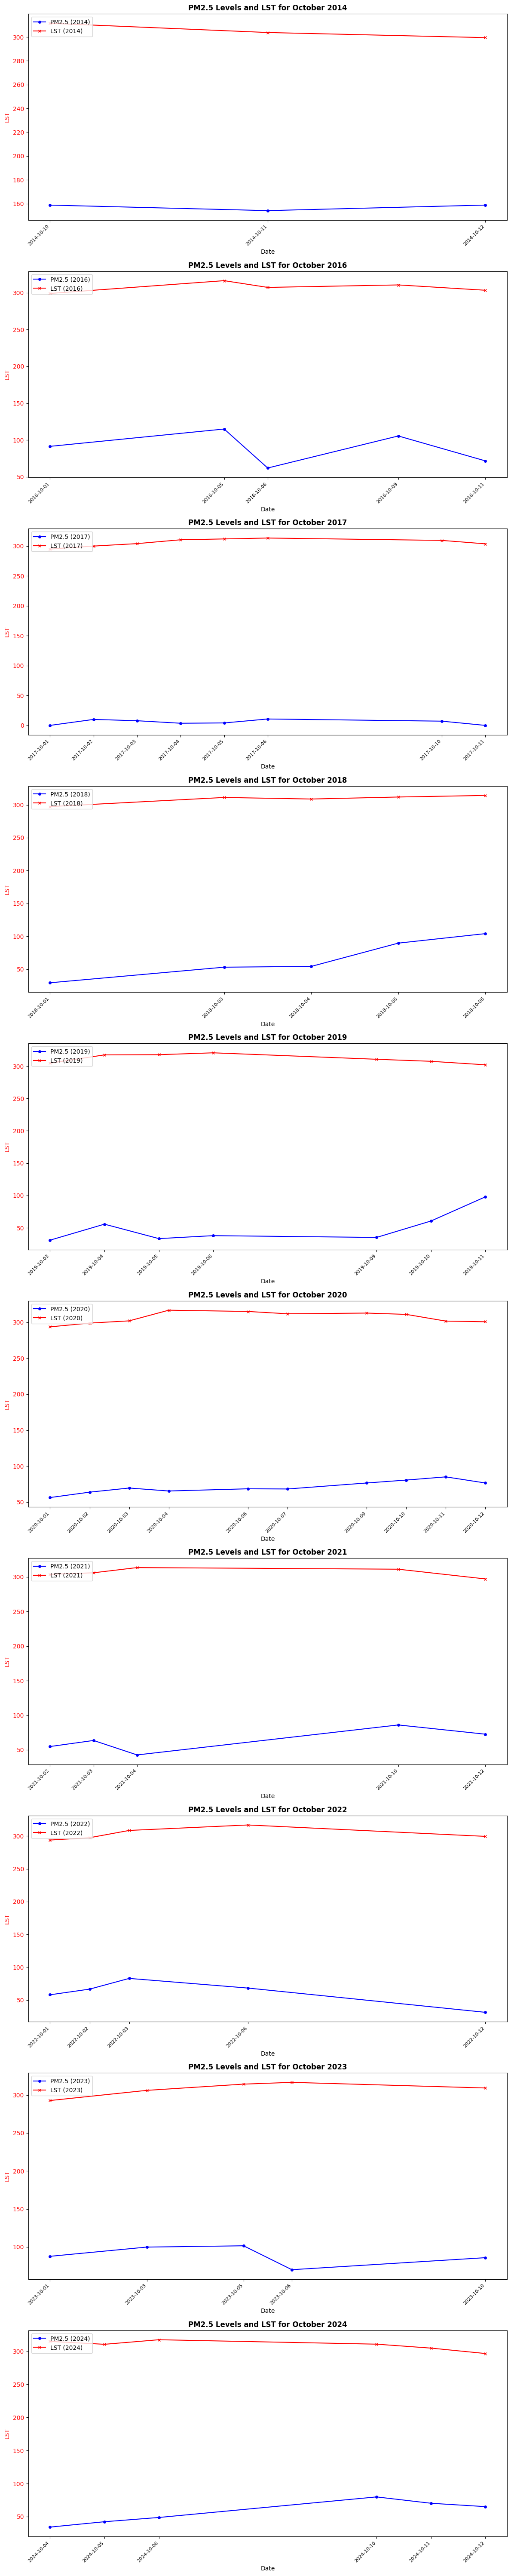

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)

# Identify the date column's format
try:
    csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Try day-first parsing
    if csv_df['Date'].isna().sum() > 0:
        csv_df['Date'] = pd.to_datetime(csv_df['Date'], format='%Y-%m-%d', errors='coerce')  # Fallback to year-first
except Exception as e:
    print(f"Error parsing dates in the CSV file: {e}")
    raise

csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year >= 2014) & (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year >= 2014) & (csv_cleaned['Date'].dt.year <= 2024)]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create a list of unique years from the data (2014-2024)
years = merged_data['Date'].dt.year.unique()

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data[merged_data['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Set x-axis to show only dates for that year
    axs[i].set_xticks(year_data['Date'])
    axs[i].set_xticklabels(year_data['Date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=8)
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


In [39]:
# Check the available dates for October in the merged data
october_dates = merged_data[merged_data['Date'].dt.month == 10]
print(october_dates['Date'].dt.date.unique())  # List all unique dates in October


[datetime.date(2014, 10, 10) datetime.date(2014, 10, 11)
 datetime.date(2014, 10, 12) datetime.date(2016, 10, 1)
 datetime.date(2016, 10, 5) datetime.date(2016, 10, 6)
 datetime.date(2016, 10, 9) datetime.date(2016, 10, 11)
 datetime.date(2017, 10, 1) datetime.date(2017, 10, 2)
 datetime.date(2017, 10, 3) datetime.date(2017, 10, 4)
 datetime.date(2017, 10, 5) datetime.date(2017, 10, 6)
 datetime.date(2017, 10, 10) datetime.date(2017, 10, 11)
 datetime.date(2018, 10, 1) datetime.date(2018, 10, 3)
 datetime.date(2018, 10, 4) datetime.date(2018, 10, 5)
 datetime.date(2018, 10, 6) datetime.date(2019, 10, 3)
 datetime.date(2019, 10, 4) datetime.date(2019, 10, 5)
 datetime.date(2019, 10, 6) datetime.date(2019, 10, 9)
 datetime.date(2019, 10, 10) datetime.date(2019, 10, 11)
 datetime.date(2020, 10, 1) datetime.date(2020, 10, 2)
 datetime.date(2020, 10, 3) datetime.date(2020, 10, 4)
 datetime.date(2020, 10, 6) datetime.date(2020, 10, 7)
 datetime.date(2020, 10, 9) datetime.date(2020, 10, 10)
 

In [41]:
# Check unique dates in merged data
print("Unique dates in merged data:", merged_data['Date'].unique())


Unique dates in merged data: <DatetimeArray>
['2014-10-10 00:00:00', '2014-10-11 00:00:00', '2014-10-12 00:00:00',
 '2016-10-01 00:00:00', '2016-10-05 00:00:00', '2016-10-06 00:00:00',
 '2016-10-09 00:00:00', '2016-10-11 00:00:00', '2017-10-01 00:00:00',
 '2017-10-02 00:00:00', '2017-10-03 00:00:00', '2017-10-04 00:00:00',
 '2017-10-05 00:00:00', '2017-10-06 00:00:00', '2017-10-10 00:00:00',
 '2017-10-11 00:00:00', '2018-10-01 00:00:00', '2018-10-03 00:00:00',
 '2018-10-04 00:00:00', '2018-10-05 00:00:00', '2018-10-06 00:00:00',
 '2019-10-03 00:00:00', '2019-10-04 00:00:00', '2019-10-05 00:00:00',
 '2019-10-06 00:00:00', '2019-10-09 00:00:00', '2019-10-10 00:00:00',
 '2019-10-11 00:00:00', '2020-10-01 00:00:00', '2020-10-02 00:00:00',
 '2020-10-03 00:00:00', '2020-10-04 00:00:00', '2020-10-06 00:00:00',
 '2020-10-07 00:00:00', '2020-10-09 00:00:00', '2020-10-10 00:00:00',
 '2020-10-11 00:00:00', '2020-10-12 00:00:00', '2021-10-02 00:00:00',
 '2021-10-03 00:00:00', '2021-10-04 00:00:00'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'/mnt/data/dilshad pm2.5.xlsx'
csv_file_path = r'/mnt/data/DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], dayfirst=True, errors='coerce')  # Parse dates
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]  # Filter out rows where LST is zero

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & 
                            (pm25_cleaned['Date'].dt.year >= 2014) & 
                            (pm25_cleaned['Date'].dt.year <= 2024)]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & 
                          (csv_cleaned['Date'].dt.year >= 2014) & 
                          (csv_cleaned['Date'].dt.year <= 2024)]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create a list of unique years from the data (2014-2024)
years = sorted(merged_data['Date'].dt.year.unique())

# Create a subplot for each year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)))

# If there is only one subplot, axs will not be an array, so ensure it's treated as an array
if len(years) == 1:
    axs = [axs]

# Loop through each year and plot the data for that year
for i, year in enumerate(years):
    year_data = merged_data[merged_data['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label=f'PM2.5 ({year})', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label=f'LST ({year})', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 Levels and LST for October {year}', fontsize=12, fontweight='bold')
    
    # Add a legend
    axs[i].legend(loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/dilshad pm2.5.xlsx'

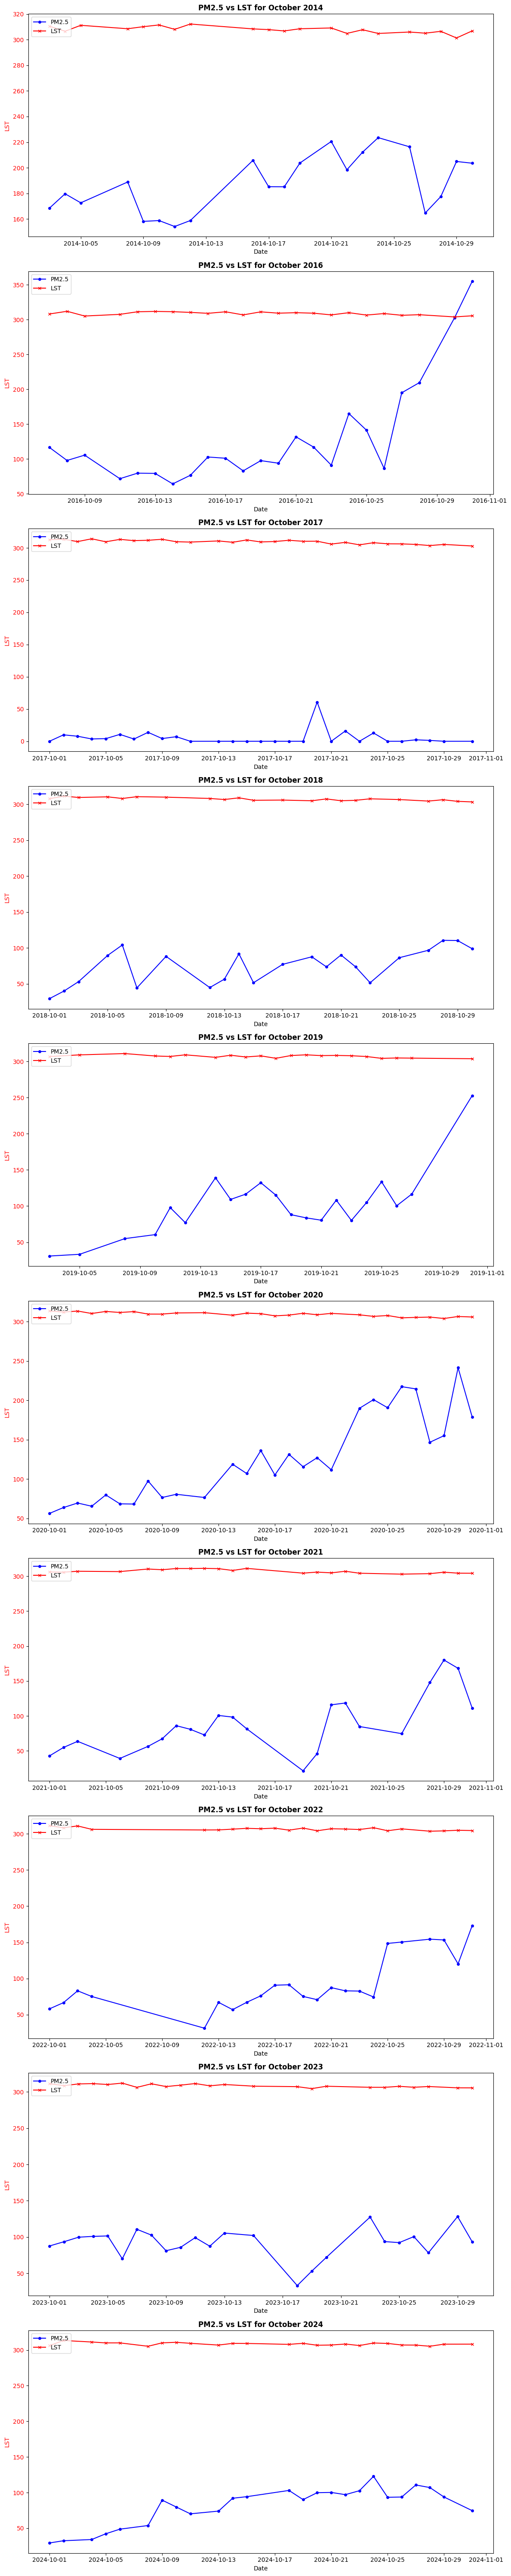

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Read and clean PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  # Rename columns for consistency
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  # Convert End_Date to datetime
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  # Keep relevant columns and drop invalid dates

# Read and clean LST data
csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')  # Convert Date column to datetime
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()  # Select relevant columns
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  # Rename column for clarity
csv_cleaned.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Filter for October data (month == 10) for all years from 2014 to 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]

# Filter out rows where LST is zero
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge datasets on Date
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Create a subplot for each year
years = sorted(merged_data['Date'].dt.year.unique())
fig, axs = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)))

if len(years) == 1:  # Ensure axs is iterable if there's only one subplot
    axs = [axs]

for i, year in enumerate(years):
    year_data = merged_data[merged_data['Date'].dt.year == year]
    
    # Plot PM2.5 levels
    axs[i].plot(year_data['Date'], year_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('PM2.5 Levels', color='blue')
    axs[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot LST
    axs[i].plot(year_data['Date'], year_data['LST'], marker='x', color='red', label='LST', markersize=4)
    axs[i].set_ylabel('LST', color='red')
    axs[i].tick_params(axis='y', labelcolor='red')
    
    # Title for each subplot
    axs[i].set_title(f'PM2.5 vs LST for October {year}', fontsize=12, fontweight='bold')
    axs[i].legend(loc='upper left')

# Adjust layout and show the plot
fig.tight_layout()
plt.show()


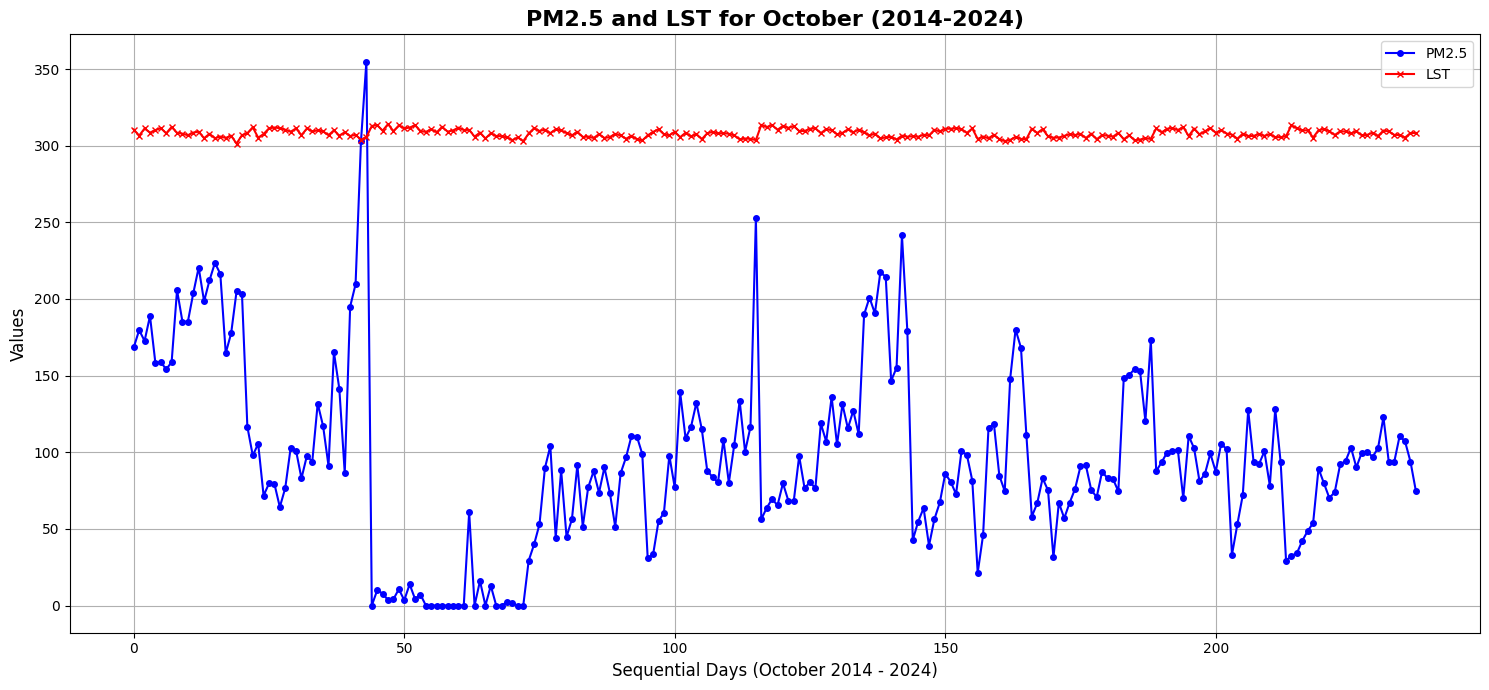

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
 
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'
 
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']  
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()  
 
csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')  
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy() 
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  
csv_cleaned.dropna(subset=['Date'], inplace=True) 
 
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]
 
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]
 
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')
 
merged_data['Sequential_Index'] = range(len(merged_data))
 
plt.figure(figsize=(15, 7))
 
plt.plot(merged_data['Sequential_Index'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
 
plt.plot(merged_data['Sequential_Index'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
 
plt.xlabel('Sequential Days (October 2014 - 2024)', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
 
plt.tight_layout()
plt.show()


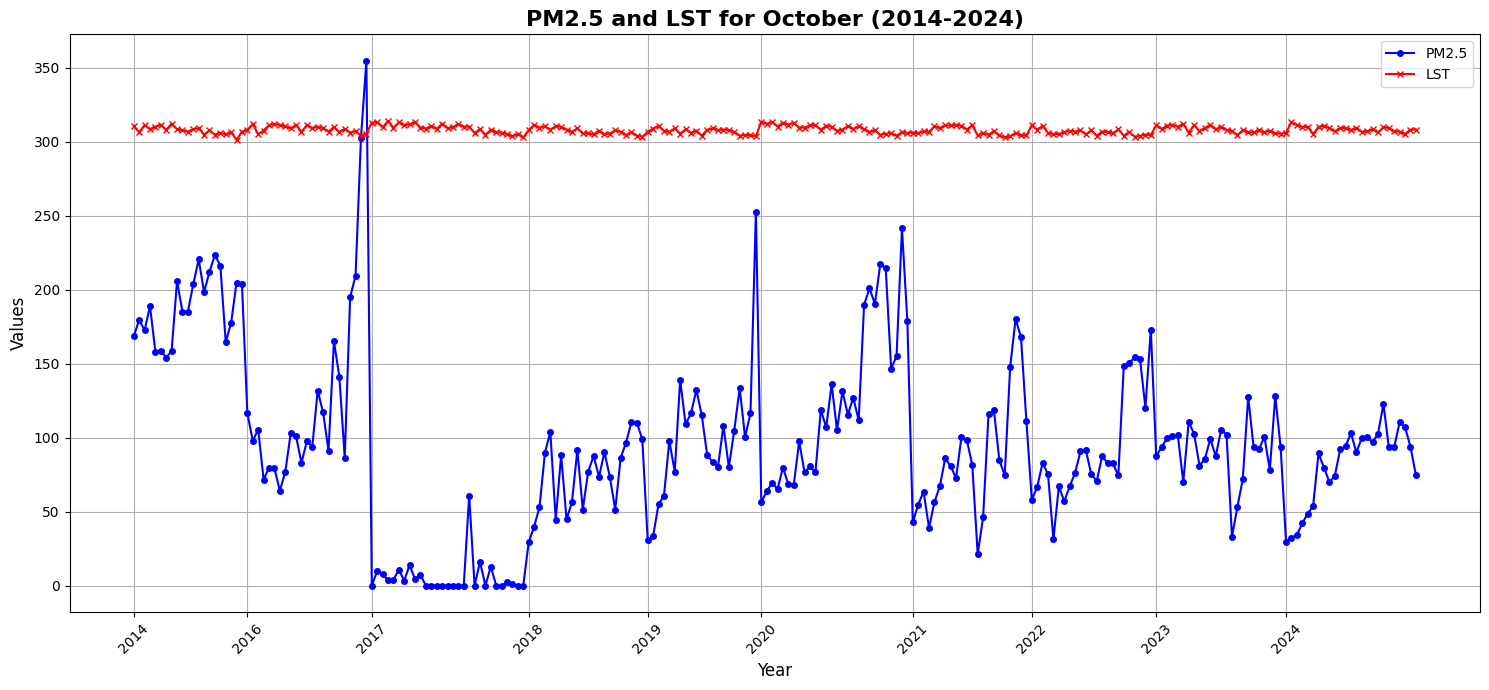

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
 
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'
 
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']   
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()   

csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')  
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()   
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  
csv_cleaned.dropna(subset=['Date'], inplace=True)  
 
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]
 
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]
 
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')
 
merged_data['Sequential_Index'] = range(len(merged_data))
 
years = merged_data['Date'].dt.year.unique()
ticks = [merged_data[merged_data['Date'].dt.year == year]['Sequential_Index'].iloc[0] for year in years]
 
plt.figure(figsize=(15, 7))
 
plt.plot(merged_data['Sequential_Index'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
 
plt.plot(merged_data['Sequential_Index'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
 
plt.xticks(ticks, years, rotation=45)  
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
 
plt.tight_layout()
plt.show()


In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path and cities 
base_path = r'C:\Users\Lenovo\Downloads\archive (1)'


cities = ['Delhi','Mumbai', 'Chennai', 'Bengaluru', 'Kolkata', 'Hyderabad']

# Function to plot diurnal graph
def plot_diurnal(city, season, season_data, output_folder):
    try:
        # Check if 'From Date' column exists
        if 'From Date' not in season_data.columns:
            raise KeyError("'From Date' column not found in the data.")

        # Convert 'From Date' to datetime and handle invalid dates
        season_data['From Date'] = pd.to_datetime(season_data['From Date'], errors='coerce')

        # Drop rows with invalid dates
        season_data = season_data.dropna(subset=['From Date'])

        # Extract hour from 'From Date'
        season_data['Hour'] = season_data['From Date'].dt.hour

        # Convert columns to numeric, if they exist
        cols_to_convert = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
            'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'RH (%)',
            'SR (W/mt2)', 'Temp (degree C)', 'WS (m/s)', 'WBGT'
        ]
        for col in cols_to_convert:
            if col in season_data.columns:
                season_data[col] = pd.to_numeric(season_data[col], errors='coerce')

        # Aggregate data by hour while ignoring NaN values
        diurnal_stats = season_data.groupby('Hour').agg({
            'PM2.5 (ug/m3)': lambda x: x.mean(skipna=True),
            'PM10 (ug/m3)': lambda x: x.mean(skipna=True),
            'NO (ug/m3)': lambda x: x.mean(skipna=True),
            'NO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'NOx (ppb)': lambda x: x.mean(skipna=True),
            'NH3 (ug/m3)': lambda x: x.mean(skipna=True),
            'SO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'CO (mg/m3)': lambda x: x.mean(skipna=True),
            'Ozone (ug/m3)': lambda x: x.mean(skipna=True),
            'WBGT': lambda x: x.mean(skipna=True)
        })

        # Plotting
        fig, ax1 = plt.subplots(figsize=(18, 10))

        plt.rcParams['font.family'] = 'serif'  # Set to default serif font
        plt.rcParams['font.size'] = 12

        pollutants = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
            'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
            'Ozone (ug/m3)'
        ]
        heat_stress = ['WBGT']

        # Plot pollutants on primary y-axis
        for pollutant in pollutants:
            if pollutant in diurnal_stats.columns:
                ax1.plot(diurnal_stats.index, diurnal_stats[pollutant], label=f'{pollutant} Mean', marker='o')

        ax1.set_xlabel('Hour of Day', fontsize=14)
        ax1.set_ylabel('Air Pollutant Concentration (ug/m3)', fontsize=14)
        ax1.legend(loc='upper left', fontsize=12)

        # Create a second y-axis for heat stress indicators
        ax2 = ax1.twinx()
        for stress in heat_stress:
            if stress in diurnal_stats.columns:
                ax2.plot(diurnal_stats.index, diurnal_stats[stress], label=f'{stress} Mean', linestyle='-', color='black', linewidth=2)

        ax2.set_ylabel('Heat Stress Indicators', fontsize=14)
        ax2.set_ylim(12, 32)  # Set y-axis range for heat stress indicators
        ax2.legend(loc='upper right', fontsize=12)

        # Set x-axis ticks to show each hour and rotate labels for better readability
        ax1.set_xticks(range(0, 24))
        ax1.set_xticklabels([f'{h:02d}:00' for h in range(0, 24)], fontsize=12, rotation=45)

        plt.title(f'Diurnal Variation in {city} - {season}', fontsize=16)
        plt.savefig(os.path.join(output_folder, f'Diurnal_{city}_{season}.png'))
        plt.close()

    except Exception as e:
        print(f"An error occurred while plotting the diurnal graph for {city} - {season}: {e}")

# Process data for each city
for city in cities:
    divided_data_folder = os.path.join(base_path, 'Graph', 'Divided', city)
    graph_folder = os.path.join(base_path, 'Graph', 'Diurnal', city)

    if not os.path.exists(graph_folder):
        os.makedirs(graph_folder)

    # Define the seasons
    seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']

    for season in seasons:
        season_folder = os.path.join(divided_data_folder, season)
        season_files = [f for f in os.listdir(season_folder) if f.endswith('.csv')]

        combined_data = pd.DataFrame()

        for file_name in season_files:
            file_path = os.path.join(season_folder, file_name)
            try:
                df = pd.read_csv(file_path)
                combined_data = pd.concat([combined_data, df], ignore_index=True)
            except Exception as e:
                print(f"An error occurred while processing '{file_path}': {e}")

        # Plot the aggregated data
        plot_diurnal(city, season, combined_data, graph_folder)

print("Processing completed and files saved.")


An error occurred while plotting the diurnal graph for Mumbai - Winter: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Mumbai - Pre Monsoon: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Mumbai - Monsoon: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Mumbai - Post Monsoon: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Chennai - Winter: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Chennai - Pre Monsoon: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Chennai - Monsoon: "'From Date' column not found in the data."
An error occurred while plotting the diurnal graph for Chennai - Post Monsoon: "'From Date' column not found in the data."
An error occurred while plotting the diurnal

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path and cities 
base_path = r'C:\Users\Lenovo\Downloads\archive (1)'


cities = ['Delhi','Mumbai', 'Chennai', 'Bengaluru', 'Kolkata', 'Hyderabad']

# Function to plot diurnal graph
def plot_diurnal(city, season, season_data, output_folder):
    try:
        # Check if 'From Date' column exists
        if 'From Date' not in season_data.columns:
            raise KeyError("'From Date' column not found in the data.")

        # Convert 'From Date' to datetime and handle invalid dates
        season_data['From Date'] = pd.to_datetime(season_data['From Date'], errors='coerce')

        # Drop rows with invalid dates
        season_data = season_data.dropna(subset=['From Date'])

        # Extract hour from 'From Date'
        season_data['Hour'] = season_data['From Date'].dt.hour

        # Convert columns to numeric, if they exist
        cols_to_convert = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
            'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'RH (%)',
            'SR (W/mt2)', 'Temp (degree C)', 'WS (m/s)', 'WBGT'
        ]
        for col in cols_to_convert:
            if col in season_data.columns:
                season_data[col] = pd.to_numeric(season_data[col], errors='coerce')

        # Aggregate data by hour while ignoring NaN values
        diurnal_stats = season_data.groupby('Hour').agg({
            'PM2.5 (ug/m3)': lambda x: x.mean(skipna=True),
            'PM10 (ug/m3)': lambda x: x.mean(skipna=True),
            'NO (ug/m3)': lambda x: x.mean(skipna=True),
            'NO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'NOx (ppb)': lambda x: x.mean(skipna=True),
            'NH3 (ug/m3)': lambda x: x.mean(skipna=True),
            'SO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'CO (mg/m3)': lambda x: x.mean(skipna=True),
            'Ozone (ug/m3)': lambda x: x.mean(skipna=True),
            'WBGT': lambda x: x.mean(skipna=True)
        })

        # Plotting
        fig, ax1 = plt.subplots(figsize=(18, 10))

        plt.rcParams['font.family'] = 'serif'  # Set to default serif font
        plt.rcParams['font.size'] = 12

        pollutants = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
            'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
            'Ozone (ug/m3)'
        ]
        heat_stress = ['WBGT']

        # Plot pollutants on primary y-axis
        for pollutant in pollutants:
            if pollutant in diurnal_stats.columns:
                ax1.plot(diurnal_stats.index, diurnal_stats[pollutant], label=f'{pollutant} Mean', marker='o')

        ax1.set_xlabel('Hour of Day', fontsize=14)
        ax1.set_ylabel('Air Pollutant Concentration (ug/m3)', fontsize=14)
        ax1.legend(loc='upper left', fontsize=12)

        # Create a second y-axis for heat stress indicators
        ax2 = ax1.twinx()
        for stress in heat_stress:
            if stress in diurnal_stats.columns:
                ax2.plot(diurnal_stats.index, diurnal_stats[stress], label=f'{stress} Mean', linestyle='-', color='black', linewidth=2)

        ax2.set_ylabel('Heat Stress Indicators', fontsize=14)
        ax2.set_ylim(12, 32)  # Set y-axis range for heat stress indicators
        ax2.legend(loc='upper right', fontsize=12)

        # Set x-axis ticks to show each hour and rotate labels for better readability
        ax1.set_xticks(range(0, 24))
        ax1.set_xticklabels([f'{h:02d}:00' for h in range(0, 24)], fontsize=12, rotation=45)

        plt.title(f'Diurnal Variation in {city} - {season}', fontsize=16)
        plt.savefig(os.path.join(output_folder, f'Diurnal_{city}_{season}.png'))
        plt.close()

    except Exception as e:
        print(f"An error occurred while plotting the diurnal graph for {city} - {season}: {e}")

# Process data for each city
for city in cities:
    divided_data_folder = os.path.join(base_path, 'Graph', 'Divided', city)
    graph_folder = os.path.join(base_path, 'Graph', 'Diurnal', city)

    if not os.path.exists(graph_folder):
        os.makedirs(graph_folder)

    # Define the seasons
    seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']

    for season in seasons:
        season_folder = os.path.join(divided_data_folder, season)
        season_files = [f for f in os.listdir(season_folder) if f.endswith('.csv')]

        combined_data = pd.DataFrame()

        for file_name in season_files:
            file_path = os.path.join(season_folder, file_name)
            try:
                df = pd.read_csv(file_path)
                combined_data = pd.concat([combined_data, df], ignore_index=True)
            except Exception as e:
                print(f"An error occurred while processing '{file_path}': {e}")

        # Plot the aggregated data
        plot_diurnal(city, season, combined_data, graph_folder)

print("Processing completed and files saved.")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Lenovo\\Downloads\\archive (1)\\Graph\\Divided\\Delhi\\Winter'

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path and cities 
base_path = r'C:\Users\Lenovo\Downloads\archive (1)'


cities = ['Delhi','Mumbai', 'Chennai', 'Bengaluru', 'Kolkata', 'Hyderabad']

# Function to plot diurnal graph
def plot_diurnal(city, season, season_data, output_folder):
    try:
        # Check if 'From Date' column exists
        if 'From Date' not in season_data.columns:
            raise KeyError("'From Date' column not found in the data.")

        # Convert 'From Date' to datetime and handle invalid dates
        season_data['From Date'] = pd.to_datetime(season_data['From Date'], errors='coerce')

        # Drop rows with invalid dates
        season_data = season_data.dropna(subset=['From Date'])

        # Extract hour from 'From Date'
        season_data['Hour'] = season_data['From Date'].dt.hour

        # Convert columns to numeric, if they exist
        cols_to_convert = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
            'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'RH (%)',
            'SR (W/mt2)', 'Temp (degree C)', 'WS (m/s)', 'WBGT'
        ]
        for col in cols_to_convert:
            if col in season_data.columns:
                season_data[col] = pd.to_numeric(season_data[col], errors='coerce')

        # Aggregate data by hour while ignoring NaN values
        diurnal_stats = season_data.groupby('Hour').agg({
            'PM2.5 (ug/m3)': lambda x: x.mean(skipna=True),
            'PM10 (ug/m3)': lambda x: x.mean(skipna=True),
            'NO (ug/m3)': lambda x: x.mean(skipna=True),
            'NO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'NOx (ppb)': lambda x: x.mean(skipna=True),
            'NH3 (ug/m3)': lambda x: x.mean(skipna=True),
            'SO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'CO (mg/m3)': lambda x: x.mean(skipna=True),
            'Ozone (ug/m3)': lambda x: x.mean(skipna=True),
            'WBGT': lambda x: x.mean(skipna=True)
        })

        # Plotting
        fig, ax1 = plt.subplots(figsize=(18, 10))

        plt.rcParams['font.family'] = 'serif'  # Set to default serif font
        plt.rcParams['font.size'] = 12

        pollutants = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
            'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
            'Ozone (ug/m3)'
        ]
        heat_stress = ['WBGT']

        # Plot pollutants on primary y-axis
        for pollutant in pollutants:
            if pollutant in diurnal_stats.columns:
                ax1.plot(diurnal_stats.index, diurnal_stats[pollutant], label=f'{pollutant} Mean', marker='o')

        ax1.set_xlabel('Hour of Day', fontsize=14)
        ax1.set_ylabel('Air Pollutant Concentration (ug/m3)', fontsize=14)
        ax1.legend(loc='upper left', fontsize=12)

        # Create a second y-axis for heat stress indicators
        ax2 = ax1.twinx()
        for stress in heat_stress:
            if stress in diurnal_stats.columns:
                ax2.plot(diurnal_stats.index, diurnal_stats[stress], label=f'{stress} Mean', linestyle='-', color='black', linewidth=2)

        ax2.set_ylabel('Heat Stress Indicators', fontsize=14)
        ax2.set_ylim(12, 32)  # Set y-axis range for heat stress indicators
        ax2.legend(loc='upper right', fontsize=12)

        # Set x-axis ticks to show each hour and rotate labels for better readability
        ax1.set_xticks(range(0, 24))
        ax1.set_xticklabels([f'{h:02d}:00' for h in range(0, 24)], fontsize=12, rotation=45)

        plt.title(f'Diurnal Variation in {city} - {season}', fontsize=16)
        plt.savefig(os.path.join(output_folder, f'Diurnal_{city}_{season}.png'))
        plt.close()

    except Exception as e:
        print(f"An error occurred while plotting the diurnal graph for {city} - {season}: {e}")

# Process data for each city
for city in cities:
    divided_data_folder = os.path.join(base_path, 'Graph', 'Divided', city)
    graph_folder = os.path.join(base_path, 'Graph', 'Diurnal', city)

    if not os.path.exists(graph_folder):
        os.makedirs(graph_folder)

    # Define the seasons
    seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']

    for season in seasons:
        season_folder = os.path.join(divided_data_folder, season)
        season_files = [f for f in os.listdir(season_folder) if f.endswith('.csv')]

        combined_data = pd.DataFrame()

        for file_name in season_files:
            file_path = os.path.join(season_folder, file_name)
            try:
                df = pd.read_csv(file_path)
                combined_data = pd.concat([combined_data, df], ignore_index=True)
            except Exception as e:
                print(f"An error occurred while processing '{file_path}': {e}")

        # Plot the aggregated data
        plot_diurnal(city, season, combined_data, graph_folder)

print("Processing completed and files saved.")

Processing completed and files saved.


In [61]:
combined_data = pd.DataFrame()


In [37]:
print(f"Processing {city} - {season}")
print(combined_data.head())  # Show the first few rows of the combined data


Processing Hyderabad - Post Monsoon
Empty DataFrame
Columns: []
Index: []


In [39]:
print(f"Checking folder: {season_folder}")
if not os.listdir(season_folder):
    print(f"No files found in {season_folder}")
else:
    print(f"Files in {season_folder}: {os.listdir(season_folder)}")


Checking folder: C:\Users\Lenovo\Downloads\archive (1)\Graph\Divided\Hyderabad\Post Monsoon
No files found in C:\Users\Lenovo\Downloads\archive (1)\Graph\Divided\Hyderabad\Post Monsoon


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Check column names to confirm the actual column name for 'Date'
print("Column Names:", data.columns)

# Assuming the column for date is actually named 'Date' (you can change this if necessary)
# Rename 'Date' column if necessary (for example, if there's a typo or extra space)
data.rename(columns=lambda x: x.strip(), inplace=True)  # Removes leading/trailing spaces if any

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Extract the hour from the 'Date' column
data['Hour'] = data['Date'].dt.hour

# Ensure numeric columns are in the right format
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Group by hour and calculate the mean
hourly_avg = data.groupby('Hour')['PM2.5'].mean()

# Format the hours as 24-hour time
hour_labels = [f"{hour:02d}:00" for hour in hourly_avg.index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(hour_labels, hourly_avg.values, marker='o', linestyle='-', color='blue', label='Average PM2.5')

# Customize the plot
plt.title('Average PM2.5 by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
 

Column Names: Index(['From Date', 'To Date', 'PM2.5 (ug/m3)'], dtype='object')


KeyError: 'Date'

Column Names: Index(['From Date', 'To Date', 'PM2.5 (ug/m3)'], dtype='object')


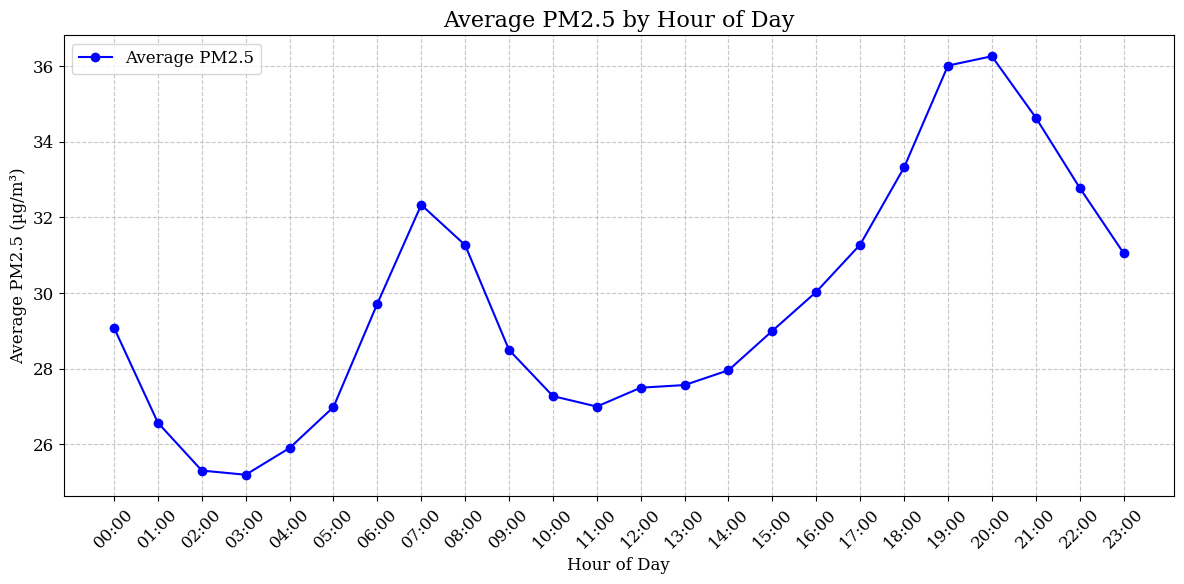

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Check column names to confirm the actual column name for 'From Date'
print("Column Names:", data.columns)

# Rename 'From Date' to 'Date' (if you want to work with a uniform column name)
data.rename(columns={'From Date': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Extract the hour from the 'Date' column
data['Hour'] = data['Date'].dt.hour

# Ensure numeric columns are in the right format
data['PM2.5 (ug/m3)'] = pd.to_numeric(data['PM2.5 (ug/m3)'], errors='coerce')

# Group by hour and calculate the mean
hourly_avg = data.groupby('Hour')['PM2.5 (ug/m3)'].mean()

# Format the hours as 24-hour time
hour_labels = [f"{hour:02d}:00" for hour in hourly_avg.index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(hour_labels, hourly_avg.values, marker='o', linestyle='-', color='blue', label='Average PM2.5')

# Customize the plot
plt.title('Average PM2.5 by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


Column Names: Index(['From Date', 'To Date', 'PM2.5 (ug/m3)'], dtype='object')


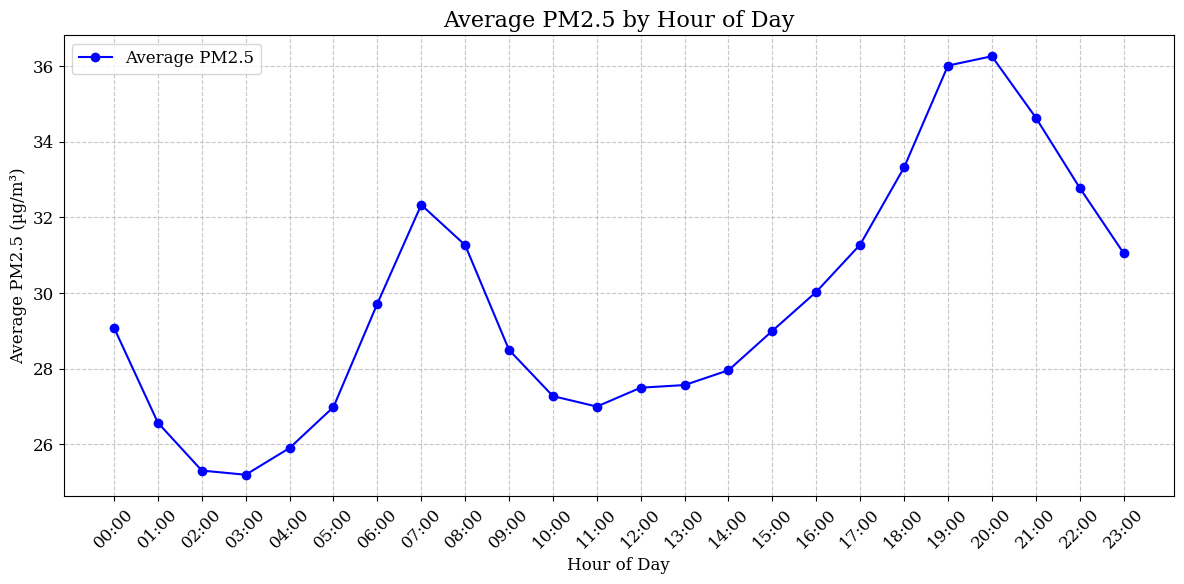

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Check column names to confirm the actual column name for 'From Date'
print("Column Names:", data.columns)

# Rename 'From Date' to 'Date' (if you want to work with a uniform column name)
data.rename(columns={'From Date': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Extract the hour from the 'Date' column
data['Hour'] = data['Date'].dt.hour

# Ensure numeric columns are in the right format
data['PM2.5 (ug/m3)'] = pd.to_numeric(data['PM2.5 (ug/m3)'], errors='coerce')

# Group by hour and calculate the mean
hourly_avg = data.groupby('Hour')['PM2.5 (ug/m3)'].mean()

# Format the hours as 24-hour time
hour_labels = [f"{hour:02d}:00" for hour in hourly_avg.index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(hour_labels, hourly_avg.values, marker='o', linestyle='-', color='blue', label='Average PM2.5')

# Customize the plot
plt.title('Average PM2.5 by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


Column Names: Index(['From Date', 'To Date', 'PM2.5 (ug/m3)'], dtype='object')


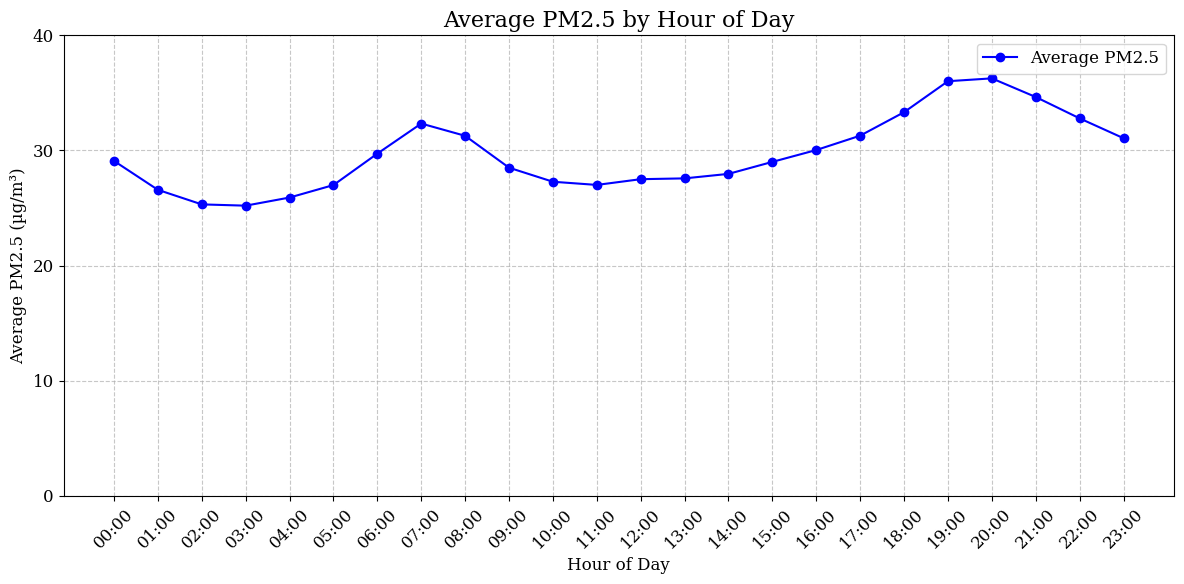

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Check column names to confirm the actual column name for 'From Date'
print("Column Names:", data.columns)

# Rename 'From Date' to 'Date' (if you want to work with a uniform column name)
data.rename(columns={'From Date': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Extract the hour from the 'Date' column
data['Hour'] = data['Date'].dt.hour

# Ensure numeric columns are in the right format
data['PM2.5 (ug/m3)'] = pd.to_numeric(data['PM2.5 (ug/m3)'], errors='coerce')

# Group by hour and calculate the mean
hourly_avg = data.groupby('Hour')['PM2.5 (ug/m3)'].mean()

# Format the hours as 24-hour time
hour_labels = [f"{hour:02d}:00" for hour in hourly_avg.index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(hour_labels, hourly_avg.values, marker='o', linestyle='-', color='blue', label='Average PM2.5')

# Customize the plot
plt.title('Average PM2.5 by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Set Y-axis ticks manually to display values like 10, 20, 30, etc.
plt.yticks(range(0, int(hourly_avg.max()) + 10, 10))  # Adjust step size if needed

plt.tight_layout()

# Show the plot
plt.show()


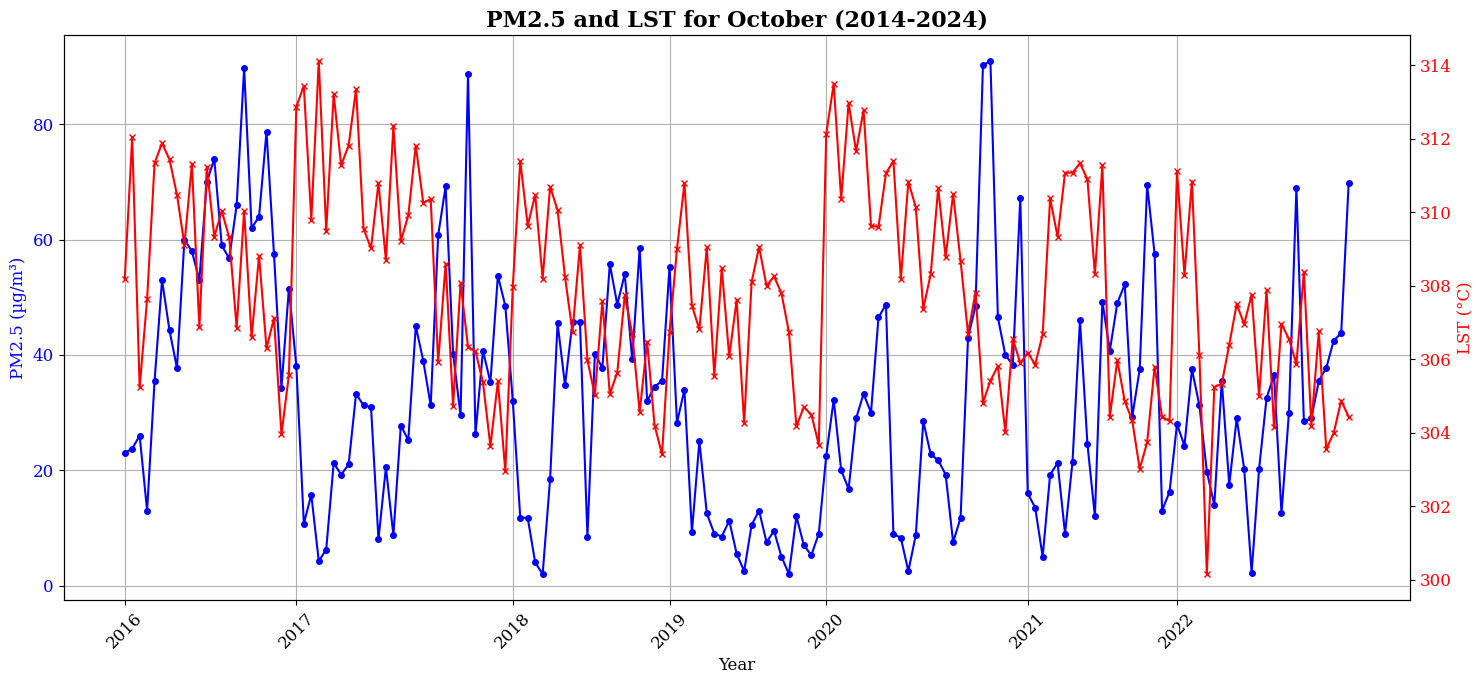

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Load PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()

# Load CSV data
csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)
csv_cleaned.dropna(subset=['Date'], inplace=True)

# Filter data for October (2014-2024)
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]

# Remove rows with LST equal to 0
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge data
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')
merged_data['Sequential_Index'] = range(len(merged_data))

# Get unique years and create ticks for the X-axis
years = merged_data['Date'].dt.year.unique()
ticks = [merged_data[merged_data['Date'].dt.year == year]['Sequential_Index'].iloc[0] for year in years]

# Plot the data with two Y-axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot PM2.5 on the left Y-axis
ax1.plot(merged_data['Sequential_Index'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5 (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ticks)
ax1.set_xticklabels(years, rotation=45)

# Create a second Y-axis for LST
ax2 = ax1.twinx()
ax2.plot(merged_data['Sequential_Index'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
ax2.set_ylabel('LST (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
ax1.grid(True)

# Show the plot with tight layout
fig.tight_layout()
plt.show()


In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# File path for the CSV data
csv_file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'

# Load the CSV data
csv_df = pd.read_csv(csv_file_path)

# Inspect the column names to make sure we can properly reference them
print(csv_df.columns)

# Assuming the CSV file has 'Date', 'PM2.5', and 'LST' columns, adjust accordingly if necessary
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')  # Convert 'Date' column to datetime
csv_cleaned = csv_df[['Date', 'PM2.5', 'LST']].dropna()  # Drop rows with missing values in Date, PM2.5, or LST

# Filter data for October (2014-2024)
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]

# Remove rows with LST equal to 0
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Add a sequential index for plotting
csv_cleaned['Sequential_Index'] = range(len(csv_cleaned))

# Get unique years and create ticks for the X-axis
years = csv_cleaned['Date'].dt.year.unique()
ticks = [csv_cleaned[csv_cleaned['Date'].dt.year == year]['Sequential_Index'].iloc[0] for year in years]

# Plot the data with two Y-axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot PM2.5 on the left Y-axis
ax1.plot(csv_cleaned['Sequential_Index'], csv_cleaned['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5 (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ticks)
ax1.set_xticklabels(years, rotation=45)

# Create a second Y-axis for LST
ax2 = ax1.twinx()
ax2.plot(csv_cleaned['Sequential_Index'], csv_cleaned['LST'], marker='x', color='red', label='LST', markersize=4)
ax2.set_ylabel('LST (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
ax1.grid(True)

# Show the plot with tight layout
fig.tight_layout()
plt.show()


Index(['From Date', 'To Date', 'PM2.5 (ug/m3)'], dtype='object')


KeyError: 'Date'

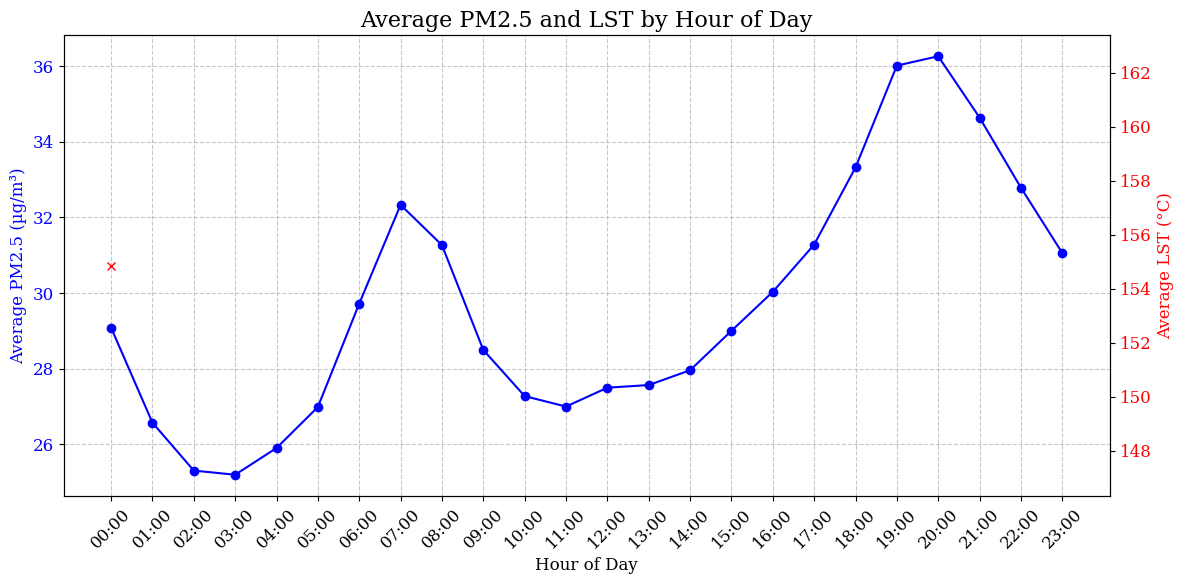

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the two CSV files
pm25_file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'  # PM2.5 data
lst_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'  # LST data

# Load the PM2.5 data
pm25_data = pd.read_csv(pm25_file_path)
pm25_data.rename(columns={'From Date': 'Date'}, inplace=True)
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'], errors='coerce')
pm25_data.dropna(subset=['Date'], inplace=True)
pm25_data['Hour'] = pm25_data['Date'].dt.hour
pm25_data['PM2.5 (ug/m3)'] = pd.to_numeric(pm25_data['PM2.5 (ug/m3)'], errors='coerce')

# Group the PM2.5 data by hour and calculate the average
pm25_hourly_avg = pm25_data.groupby('Hour')['PM2.5 (ug/m3)'].mean()

# Format the hours as 24-hour time for the PM2.5 data
pm25_hour_labels = [f"{hour:02d}:00" for hour in pm25_hourly_avg.index]

# Load the LST data
lst_data = pd.read_csv(lst_file_path)
lst_data['Date'] = pd.to_datetime(lst_data['Date'], errors='coerce')
lst_data.dropna(subset=['Date'], inplace=True)
lst_data['Hour'] = lst_data['Date'].dt.hour
lst_data.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)

# Group the LST data by hour and calculate the average
lst_hourly_avg = lst_data.groupby('Hour')['LST'].mean()

# Format the hours as 24-hour time for the LST data
lst_hour_labels = [f"{hour:02d}:00" for hour in lst_hourly_avg.index]

# Plot both PM2.5 and LST data on the same graph with different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PM2.5 on the left Y-axis
ax1.plot(pm25_hour_labels, pm25_hourly_avg.values, marker='o', linestyle='-', color='blue', label='Average PM2.5')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Average PM2.5 (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(pm25_hour_labels)
ax1.set_xticklabels(pm25_hour_labels, rotation=45)

# Create a second Y-axis for LST
ax2 = ax1.twinx()
ax2.plot(lst_hour_labels, lst_hourly_avg.values, marker='x', linestyle='-', color='red', label='Average LST')
ax2.set_ylabel('Average LST (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Average PM2.5 and LST by Hour of Day', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
fig.tight_layout()
plt.show()


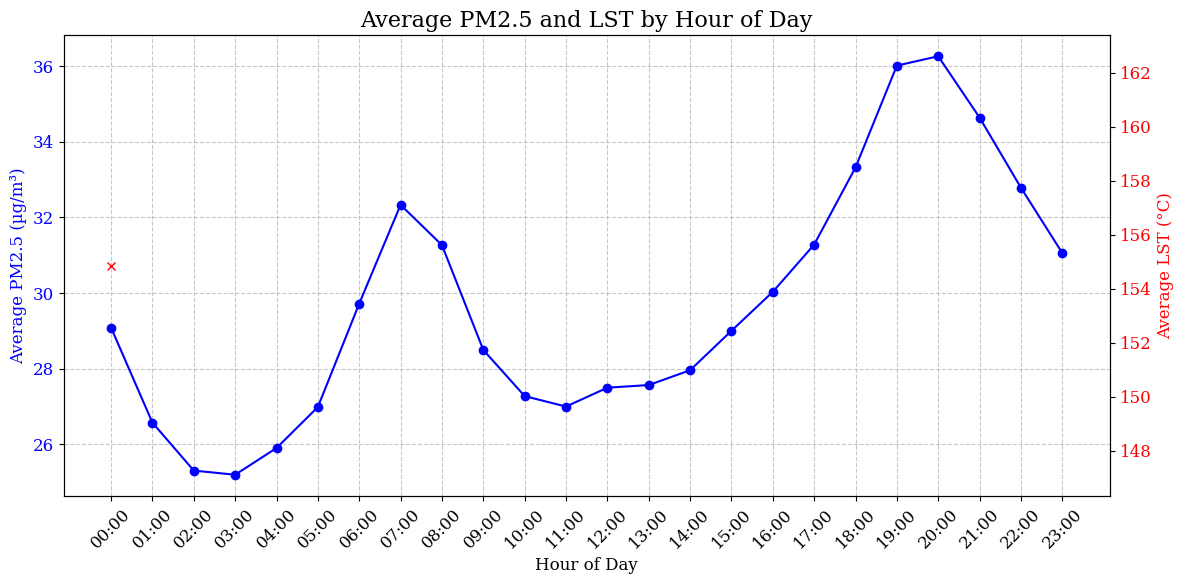

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the two CSV files
pm25_file_path = r'C:\Users\Lenovo\Downloads\hourly lst vs pm2.5 idk what station.csv'  # PM2.5 data
lst_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'  # LST data

# Load the PM2.5 data
pm25_data = pd.read_csv(pm25_file_path)
pm25_data.rename(columns={'From Date': 'Date'}, inplace=True)
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'], errors='coerce')
pm25_data.dropna(subset=['Date'], inplace=True)
pm25_data['Hour'] = pm25_data['Date'].dt.hour
pm25_data['PM2.5 (ug/m3)'] = pd.to_numeric(pm25_data['PM2.5 (ug/m3)'], errors='coerce')

# Group the PM2.5 data by hour and calculate the average
pm25_hourly_avg = pm25_data.groupby('Hour')['PM2.5 (ug/m3)'].mean()

# Format the hours as 24-hour time for the PM2.5 data
pm25_hour_labels = [f"{hour:02d}:00" for hour in pm25_hourly_avg.index]

# Load the LST data
lst_data = pd.read_csv(lst_file_path)
lst_data['Date'] = pd.to_datetime(lst_data['Date'], errors='coerce')
lst_data.dropna(subset=['Date'], inplace=True)
lst_data['Hour'] = lst_data['Date'].dt.hour
lst_data.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)

# Group the LST data by hour and calculate the average
lst_hourly_avg = lst_data.groupby('Hour')['LST'].mean()

# Format the hours as 24-hour time for the LST data
lst_hour_labels = [f"{hour:02d}:00" for hour in lst_hourly_avg.index]

# Plot both PM2.5 and LST data on the same graph with different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PM2.5 on the left Y-axis
ax1.plot(pm25_hour_labels, pm25_hourly_avg.values, marker='o', linestyle='-', color='blue', label='Average PM2.5')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Average PM2.5 (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(pm25_hour_labels)
ax1.set_xticklabels(pm25_hour_labels, rotation=45)

# Create a second Y-axis for LST
ax2 = ax1.twinx()
ax2.plot(lst_hour_labels, lst_hourly_avg.values, marker='x', linestyle='-', color='red', label='Average LST')
ax2.set_ylabel('Average LST (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Average PM2.5 and LST by Hour of Day', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
fig.tight_layout()
plt.show()


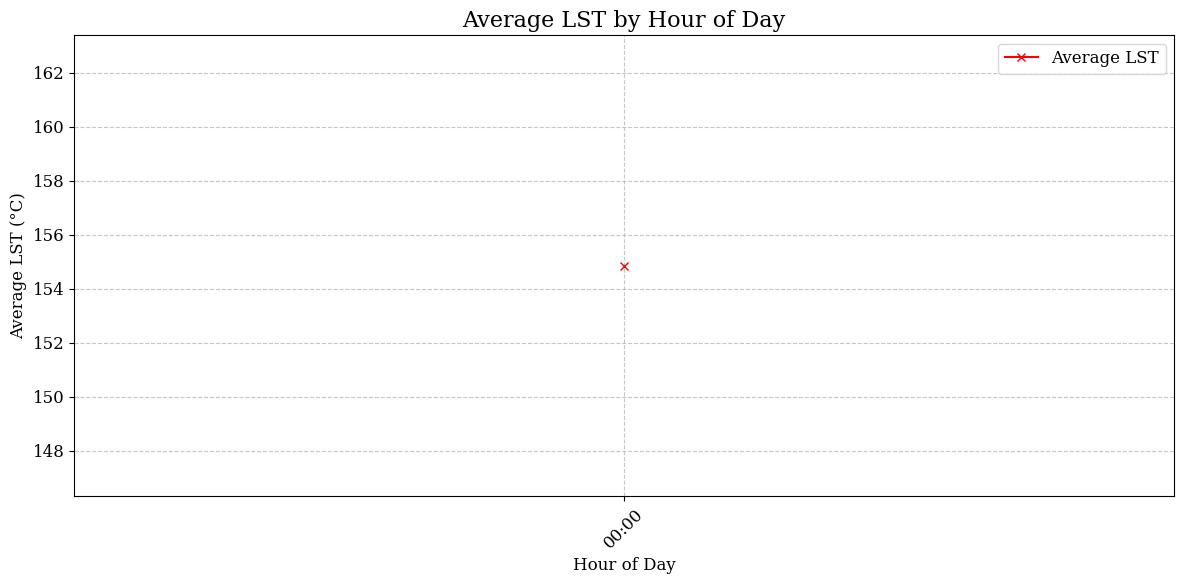

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# File path for the LST data
lst_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'  # LST data

# Load the LST data
lst_data = pd.read_csv(lst_file_path)
lst_data['Date'] = pd.to_datetime(lst_data['Date'], errors='coerce')
lst_data.dropna(subset=['Date'], inplace=True)
lst_data['Hour'] = lst_data['Date'].dt.hour
lst_data.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)

# Group the LST data by hour and calculate the average
lst_hourly_avg = lst_data.groupby('Hour')['LST'].mean()

# Format the hours as 24-hour time for the LST data
lst_hour_labels = [f"{hour:02d}:00" for hour in lst_hourly_avg.index]

# Plot the LST data
plt.figure(figsize=(12, 6))
plt.plot(lst_hour_labels, lst_hourly_avg.values, marker='x', linestyle='-', color='red', label='Average LST')

# Customize the plot
plt.title('Average LST by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average LST (°C)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


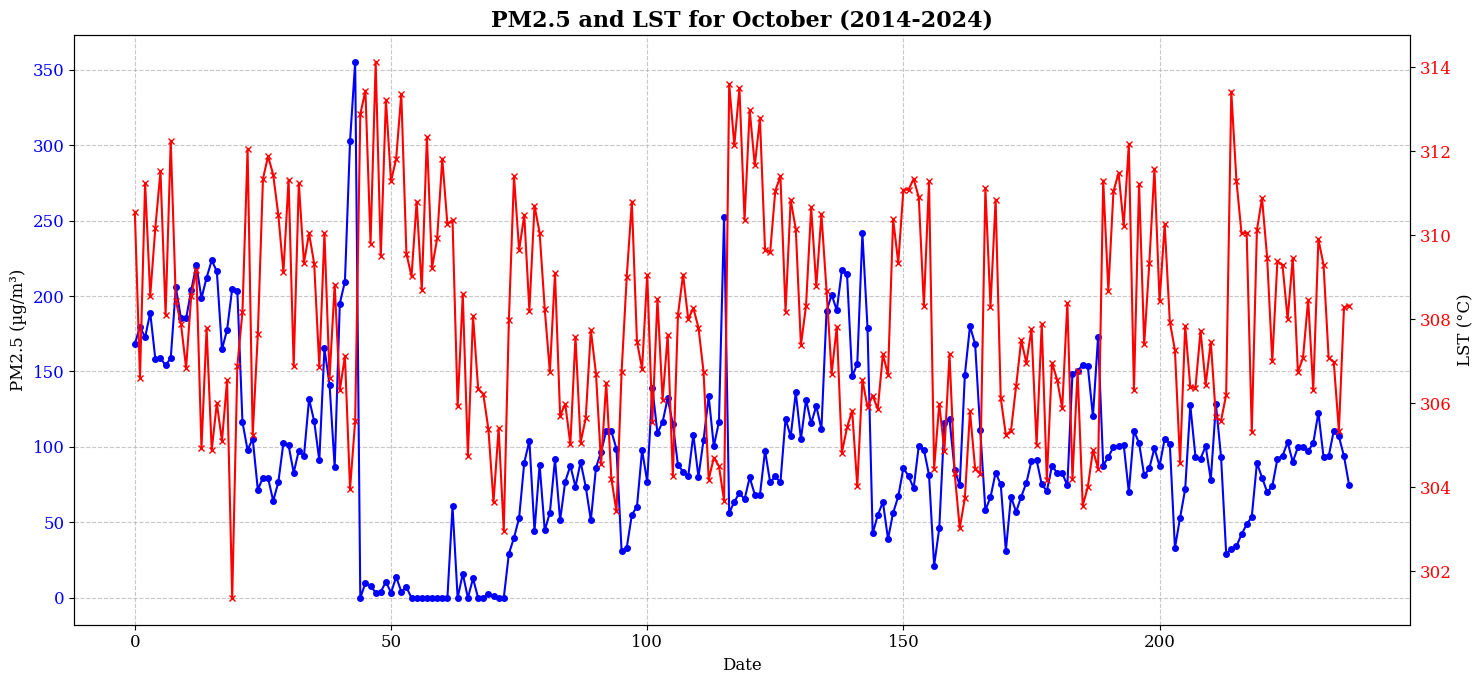

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'

# Load PM2.5 data
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()

# Load LST data
csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)
csv_cleaned.dropna(subset=['Date'], inplace=True)

# Filter the data for October and the years between 2014 and 2024
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]

# Remove any rows with LST equal to 0
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]

# Merge the two datasets on 'Date'
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')

# Add a sequential index for plotting purposes
merged_data['Sequential_Index'] = range(len(merged_data))

# Set up the figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot PM2.5 on the first Y-axis (left side)
ax1.plot(merged_data['Sequential_Index'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('PM2.5 (µg/m³)', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second Y-axis (right side) for LST
ax2 = ax1.twinx()
ax2.plot(merged_data['Sequential_Index'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
ax2.set_ylabel('LST (°C)', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and a legend
plt.title('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
fig.tight_layout()

# Show the plot
plt.show()


<Figure size 1500x700 with 0 Axes>

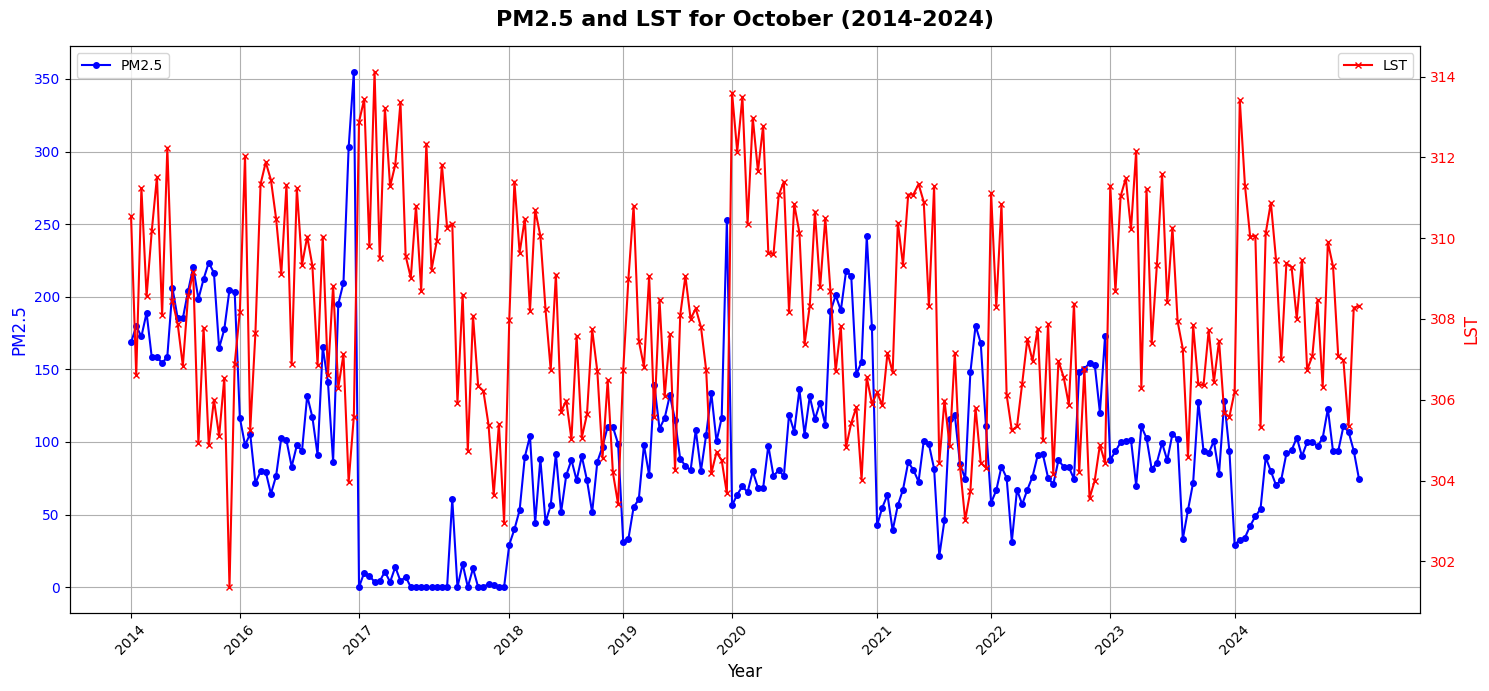

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'
 
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']   
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()   

csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')  
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()   
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  
csv_cleaned.dropna(subset=['Date'], inplace=True)  
 
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]
 
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]
 
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')
 
merged_data['Sequential_Index'] = range(len(merged_data))
 
years = merged_data['Date'].dt.year.unique()
ticks = [merged_data[merged_data['Date'].dt.year == year]['Sequential_Index'].iloc[0] for year in years]
 
plt.figure(figsize=(15, 7))
 
# Plot for PM2.5 on the left y-axis
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.plot(merged_data['Sequential_Index'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ticks)
ax1.set_xticklabels(years, rotation=45)
ax1.grid(True)
 
# Create a second y-axis for LST
ax2 = ax1.twinx()
ax2.plot(merged_data['Sequential_Index'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
ax2.set_ylabel('LST', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
 
# Add title and legend
fig.suptitle('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
 
plt.tight_layout()
plt.show()


<Figure size 1500x700 with 0 Axes>

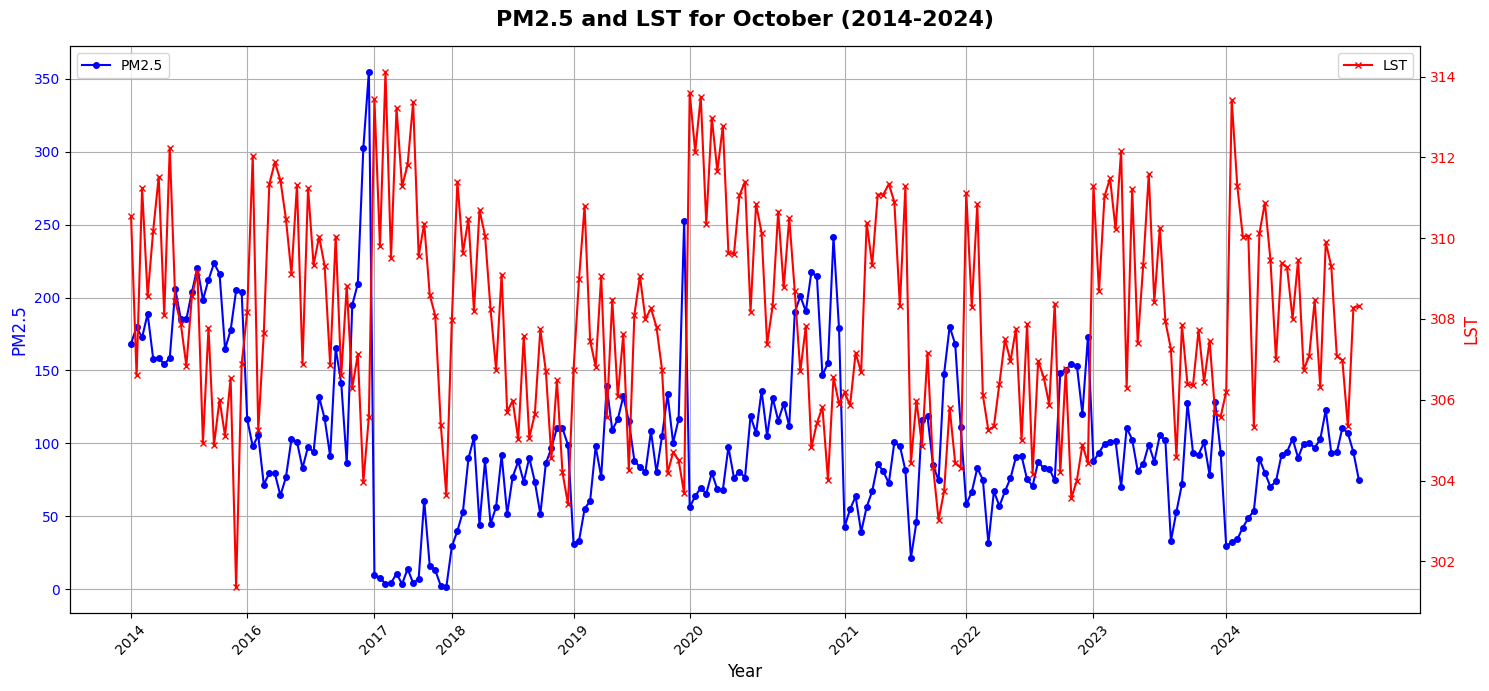

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
 
pm25_file_path = r'C:\Users\Lenovo\Downloads\dilshad pm2.5.xlsx'
csv_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'
 
pm25_data = pd.ExcelFile(pm25_file_path)
pm25_df = pm25_data.parse('Sheet1')
pm25_df.columns = ['Start_Date', 'End_Date', 'PM2.5']   
pm25_df['Date'] = pd.to_datetime(pm25_df['End_Date'], dayfirst=True, errors='coerce')  
pm25_cleaned = pm25_df[['Date', 'PM2.5']].dropna()   

# Exclude zero PM2.5 values
pm25_cleaned = pm25_cleaned[pm25_cleaned['PM2.5'] != 0]

csv_df = pd.read_csv(csv_file_path)
csv_df['Date'] = pd.to_datetime(csv_df['Date'], errors='coerce')  
csv_cleaned = csv_df[['Date', 'MYD11A1_061_LST_Day_1km']].copy()   
csv_cleaned.rename(columns={'MYD11A1_061_LST_Day_1km': 'LST'}, inplace=True)  
csv_cleaned.dropna(subset=['Date'], inplace=True)  
 
pm25_cleaned = pm25_cleaned[(pm25_cleaned['Date'].dt.month == 10) & (pm25_cleaned['Date'].dt.year.between(2014, 2024))]
csv_cleaned = csv_cleaned[(csv_cleaned['Date'].dt.month == 10) & (csv_cleaned['Date'].dt.year.between(2014, 2024))]
 
csv_cleaned = csv_cleaned[csv_cleaned['LST'] != 0]
 
merged_data = pd.merge(pm25_cleaned, csv_cleaned, on='Date', how='inner')
 
merged_data['Sequential_Index'] = range(len(merged_data))
 
years = merged_data['Date'].dt.year.unique()
ticks = [merged_data[merged_data['Date'].dt.year == year]['Sequential_Index'].iloc[0] for year in years]
 
plt.figure(figsize=(15, 7))
 
# Plot for PM2.5 on the left y-axis
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.plot(merged_data['Sequential_Index'], merged_data['PM2.5'], marker='o', color='blue', label='PM2.5', markersize=4)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(ticks)
ax1.set_xticklabels(years, rotation=45)
ax1.grid(True)
 
# Create a second y-axis for LST
ax2 = ax1.twinx()
ax2.plot(merged_data['Sequential_Index'], merged_data['LST'], marker='x', color='red', label='LST', markersize=4)
ax2.set_ylabel('LST', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
 
# Add title and legend
fig.suptitle('PM2.5 and LST for October (2014-2024)', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
 
plt.tight_layout()
plt.show()


In [1]:
import h5py

# File path
file_path = r"C:\Users\Lenovo\Downloads\ATL03_20240302124519_11412201_006_01.h5"

def explore_hdf5(group):
    while True:
        print("\nCurrent level keys:")
        keys = list(group.keys())
        for idx, key in enumerate(keys, start=1):
            print(f"{idx}. {key}")
        print("0. Go back")
        
        choice = input("Enter the number of the key you want to explore: ").strip()
        if choice == "0":
            return  # Go back to the previous level
        
        if not choice.isdigit() or int(choice) < 1 or int(choice) > len(keys):
            print("Invalid choice. Please try again.")
            continue
        
        selected_key = keys[int(choice) - 1]
        selected_item = group[selected_key]
        
        if isinstance(selected_item, h5py.Group):
            print(f"'{selected_key}' is a group. Entering the group...")
            explore_hdf5(selected_item)  # Recursive call to explore the group
        elif isinstance(selected_item, h5py.Dataset):
            print(f"'{selected_key}' is a dataset. Displaying its contents:")
            print(selected_item[:])  # Print the dataset's contents
        else:
            print(f"'{selected_key}' is neither a group nor a dataset.")
            continue

# Open the HDF5 file
with h5py.File(file_path, "r") as h5_file:
    print("Welcome to the HDF5 Explorer!")
    explore_hdf5(h5_file)

print("Exiting the HDF5 Explorer.")

Welcome to the HDF5 Explorer!

Current level keys:
1. ds_surf_type
2. ds_xyz
3. ancillary_data
4. atlas_impulse_response
5. orbit_info
6. quality_assessment
7. METADATA
8. gt1l
9. gt1r
10. gt2l
11. gt2r
12. gt3l
13. gt3r
0. Go back


Enter the number of the key you want to explore:  9


'gt1r' is a group. Entering the group...

Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  4


'heights' is a group. Entering the group...

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  4


'h_ph' is a dataset. Displaying its contents:
[-95.08679  -96.848206 -94.97766  ... 155.32083  155.08054  155.15053 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  0



Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  1


'bckgrd_atlas' is a group. Entering the group...

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  9


'tlm_height_band1' is a dataset. Displaying its contents:
[116.91907 116.91907 116.91907 ... 188.86926 188.86926 188.86926]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  1


'bckgrd_counts' is a dataset. Displaying its contents:
[174 174 151 ... 229 204 205]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  2


'bckgrd_counts_reduced' is a dataset. Displaying its contents:
[ 63  67  49 ... 112  92  83]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  3


'bckgrd_hist_top' is a dataset. Displaying its contents:
[239.25542 239.25542 238.98141 ... 547.8158  547.8158  547.8158 ]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  4


'bckgrd_int_height' is a dataset. Displaying its contents:
[608.57874 608.57874 605.58075 ... 749.4812  749.4812  749.4812 ]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  5


'bckgrd_int_height_reduced' is a dataset. Displaying its contents:
[607.7913  607.1971  604.46075 ... 746.14026 746.6805  746.31445]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  6


'bckgrd_rate' is a dataset. Displaying its contents:
[310746.88 330800.25 243023.72 ... 450005.94 369380.28 333408.7 ]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  7


'delta_time' is a dataset. Displaying its contents:
[1.94618719e+08 1.94618719e+08 1.94618719e+08 ... 1.94619141e+08
 1.94619141e+08 1.94619141e+08]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  8


'pce_mframe_cnt' is a dataset. Displaying its contents:
[354326817 354326817 354326818 ... 354347923 354347923 354347923]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  9


'tlm_height_band1' is a dataset. Displaying its contents:
[116.91907 116.91907 116.91907 ... 188.86926 188.86926 188.86926]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  10


'tlm_height_band2' is a dataset. Displaying its contents:
[0. 0. 0. ... 0. 0. 0.]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  11


'tlm_top_band1' is a dataset. Displaying its contents:
[-36.631706 -36.631706 -36.9057   ... 247.95422  247.95422  247.95422 ]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  12


'tlm_top_band2' is a dataset. Displaying its contents:
[239.33812 239.33812 239.06413 ... 547.95917 547.95917 547.95917]

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  13


Invalid choice. Please try again.

Current level keys:
1. bckgrd_counts
2. bckgrd_counts_reduced
3. bckgrd_hist_top
4. bckgrd_int_height
5. bckgrd_int_height_reduced
6. bckgrd_rate
7. delta_time
8. pce_mframe_cnt
9. tlm_height_band1
10. tlm_height_band2
11. tlm_top_band1
12. tlm_top_band2
0. Go back


Enter the number of the key you want to explore:  0



Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  4


'heights' is a group. Entering the group...

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  1


'delta_time' is a dataset. Displaying its contents:
[1.94618719e+08 1.94618719e+08 1.94618719e+08 ... 1.94619141e+08
 1.94619141e+08 1.94619141e+08]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  2


'dist_ph_across' is a dataset. Displaying its contents:
[ 3141.4163  3141.4246  3141.4158 ... -3271.6501 -3271.6492 -3271.6487]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  3


'dist_ph_along' is a dataset. Displaying its contents:
[ 1.2278025  1.2221884  1.2281767 ... 18.676523  19.38441   19.384407 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  4


'h_ph' is a dataset. Displaying its contents:
[-95.08679  -96.848206 -94.97766  ... 155.32083  155.08054  155.15053 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  5


'lat_ph' is a dataset. Displaying its contents:
[-2.83346957e-03 -2.83352838e-03 -2.83346593e-03 ...  2.70028127e+01
  2.70028191e+01  2.70028191e+01]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  6


'lon_ph' is a dataset. Displaying its contents:
[73.81420237 73.81420231 73.81420238 ... 71.09934251 71.0993418
 71.0993418 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  4


'h_ph' is a dataset. Displaying its contents:
[-95.08679  -96.848206 -94.97766  ... 155.32083  155.08054  155.15053 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  0



Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  0



Current level keys:
1. ds_surf_type
2. ds_xyz
3. ancillary_data
4. atlas_impulse_response
5. orbit_info
6. quality_assessment
7. METADATA
8. gt1l
9. gt1r
10. gt2l
11. gt2r
12. gt3l
13. gt3r
0. Go back


Enter the number of the key you want to explore:  9


'gt1r' is a group. Entering the group...

Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  4


'heights' is a group. Entering the group...

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  4


'h_ph' is a dataset. Displaying its contents:
[-95.08679  -96.848206 -94.97766  ... 155.32083  155.08054  155.15053 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  12


'signal_conf_ph' is a dataset. Displaying its contents:
[[-1  4 -1 -1 -1]
 [-1  1 -1 -1 -1]
 [-1  4 -1 -1 -1]
 ...
 [ 4 -1 -1 -1 -1]
 [ 4 -1 -1 -1 -1]
 [ 4 -1 -1 -1 -1]]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  6


'lon_ph' is a dataset. Displaying its contents:
[73.81420237 73.81420231 73.81420238 ... 71.09934251 71.0993418
 71.0993418 ]

Current level keys:
1. delta_time
2. dist_ph_across
3. dist_ph_along
4. h_ph
5. lat_ph
6. lon_ph
7. pce_mframe_cnt
8. ph_id_channel
9. ph_id_count
10. ph_id_pulse
11. quality_ph
12. signal_conf_ph
13. weight_ph
0. Go back


Enter the number of the key you want to explore:  0



Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  


Invalid choice. Please try again.

Current level keys:
1. bckgrd_atlas
2. geolocation
3. geophys_corr
4. heights
5. signal_find_output
0. Go back


Enter the number of the key you want to explore:  0



Current level keys:
1. ds_surf_type
2. ds_xyz
3. ancillary_data
4. atlas_impulse_response
5. orbit_info
6. quality_assessment
7. METADATA
8. gt1l
9. gt1r
10. gt2l
11. gt2r
12. gt3l
13. gt3r
0. Go back


Enter the number of the key you want to explore:  0


Exiting the HDF5 Explorer.


In [3]:
import pandas as pd

# Load the Excel file
file_path =  r"C:\Users\Lenovo\Downloads\111dd.xlsx"
data = pd.ExcelFile(file_path)

# Load the specific sheet into a DataFrame
df = data.parse('111d')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define the seasonal stretches
seasons = [
    ('2018-12-01', '2019-02-28'),
    ('2019-12-01', '2020-02-29')
]

# Iterate through each season and calculate max and min1

for start_date, end_date in seasons:
    seasonal_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    day_view_time = seasonal_data['MYD11A1_061_Day_view_time']
    
    # Remove values equal to 255
    valid_values = day_view_time[day_view_time < 255]
    
    # Calculate max and min
    max_value = valid_values.max()
    min_value = valid_values.min()
    
    print(f"Season: {start_date} to {end_date}")
    print(f"Maximum value (below 255): {max_value}")
    print(f"Minimum value: {min_value}\n")


Season: 2018-12-01 to 2019-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5

Season: 2019-12-01 to 2020-02-29
Maximum value (below 255): 14.1000004
Minimum value: 12.5



In [7]:
import pandas as pd

# Load the Excel file
file_path =  r"C:\Users\Lenovo\Downloads\111dd.xlsx"
data = pd.ExcelFile(file_path)

# Load the specific sheet into a DataFrame
df = data.parse('111d')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Generate seasonal ranges from December 2013 onwards
start_year = 2013
end_year = df['Date'].dt.year.max()

seasons = [(f"{year}-12-01", f"{year + 1}-02-28") for year in range(start_year, end_year)]

# Iterate through each season and calculate max and min
for start_date, end_date in seasons:
    seasonal_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    day_view_time = seasonal_data['MYD11A1_061_Day_view_time']
    
    # Remove values equal to 255
    valid_values = day_view_time[day_view_time < 255]
    
    # Calculate max and min
    if not valid_values.empty:
        max_value = valid_values.max()
        min_value = valid_values.min()
        
        print(f"Season: {start_date} to {end_date}")
        print(f"Maximum value (below 255): {max_value}")
        print(f"Minimum value: {min_value}\n")
    else:
        print(f"Season: {start_date} to {end_date}")
        print("No valid data for this season.\n")


Season: 2013-12-01 to 2014-02-28
Maximum value (below 255): 14.0
Minimum value: 12.6999998

Season: 2014-12-01 to 2015-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.6000004

Season: 2015-12-01 to 2016-02-28
Maximum value (below 255): 14.0
Minimum value: 12.5

Season: 2016-12-01 to 2017-02-28
Maximum value (below 255): 14.0
Minimum value: 12.5

Season: 2017-12-01 to 2018-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5

Season: 2018-12-01 to 2019-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5

Season: 2019-12-01 to 2020-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5

Season: 2020-12-01 to 2021-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5

Season: 2021-12-01 to 2022-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5

Season: 2022-12-01 to 2023-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.6999998

Season: 2023-12-01 to 2024-02-28
Maximum value (below 255): 14.4000006
Minimum v

In [9]:
import pandas as pd

# Load the Excel file
file_path =  r"C:\Users\Lenovo\Downloads\111dd.xlsx"
data = pd.ExcelFile(file_path)

# Load the specific sheet into a DataFrame
df = data.parse('111d')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Generate seasonal ranges from December 2013 onwards
start_year = 2013
end_year = df['Date'].dt.year.max()

seasons = [(f"{year}-12-01", f"{year + 1}-02-28") for year in range(start_year, end_year)]

# Iterate through each season and calculate max, min, and difference
for start_date, end_date in seasons:
    seasonal_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    day_view_time = seasonal_data['MYD11A1_061_Day_view_time']
    
    # Remove values equal to 255
    valid_values = day_view_time[day_view_time < 255]
    
    if not valid_values.empty:
        max_value = valid_values.max()
        min_value = valid_values.min()
        difference = max_value - min_value
        
        print(f"Season: {start_date} to {end_date}")
        print(f"Maximum value (below 255): {max_value}")
        print(f"Minimum value: {min_value}")
        print(f"Difference: {difference}\n")
    else:
        print(f"Season: {start_date} to {end_date}")
        print("No valid data for this season.\n")


Season: 2013-12-01 to 2014-02-28
Maximum value (below 255): 14.0
Minimum value: 12.6999998
Difference: 1.3000001999999995

Season: 2014-12-01 to 2015-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.6000004
Difference: 1.5

Season: 2015-12-01 to 2016-02-28
Maximum value (below 255): 14.0
Minimum value: 12.5
Difference: 1.5

Season: 2016-12-01 to 2017-02-28
Maximum value (below 255): 14.0
Minimum value: 12.5
Difference: 1.5

Season: 2017-12-01 to 2018-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5
Difference: 1.6000004000000008

Season: 2018-12-01 to 2019-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5
Difference: 1.6000004000000008

Season: 2019-12-01 to 2020-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5
Difference: 1.6000004000000008

Season: 2020-12-01 to 2021-02-28
Maximum value (below 255): 14.1000004
Minimum value: 12.5
Difference: 1.6000004000000008

Season: 2021-12-01 to 2022-02-28
Maximum value (below 255): 14.1000

In [19]:
#Daily Data Seasonal Division
import os
import pandas as pd

# Define the base path and cities
base_path = r'C:\Users\Lenovo\Downloads'

data_folder = os.path.join(base_path, 'Dailydata')  # Updated to Resultpy/Dailydata
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Hyderabad']
graph_folder = os.path.join(base_path, 'Graph', 'Seasonal_DD')  # Output folder

# Create the directory structure if it doesn't exist
if not os.path.exists(graph_folder):
    os.makedirs(graph_folder)

# Create the directory structure for each city and season
seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']
for city in cities:
    city_folder = os.path.join(graph_folder, city)
    if not os.path.exists(city_folder):
        os.makedirs(city_folder)
    for season in seasons:
        season_folder = os.path.join(city_folder, season)
        if not os.path.exists(season_folder):
            os.makedirs(season_folder)

# Function to filter and save data for a specific season
def filter_and_save_data(city, file_name, df, output_folder, season):
    print(f"Processing file: {file_name} for city: {city}, season: {season}")

    # Ensure 'From Date' is a datetime object
    df['From Date'] = pd.to_datetime(df['From Date'], format='%m %d %Y', errors='coerce')


    # Drop rows with invalid 'From Date'
    initial_rows = len(df)
    df = df.dropna(subset=['From Date'])
    valid_rows = len(df)

    if initial_rows != valid_rows:
        print(f"Warning: {initial_rows - valid_rows} rows with invalid 'From Date' dropped.")

    # Define additional columns for filtering
    df['Month'] = df['From Date'].dt.month
    df['Year'] = df['From Date'].dt.year

    # Define the year range
    start_year = 2014
    end_year = 2023

    # Filter data for the specified year range
    df_last_10_years = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    print(f"Data filtered for years {start_year} to {end_year}. Rows remaining: {len(df_last_10_years)}")

    # Filter data for the specific season
    if season == 'Winter':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 12) | (df_last_10_years['Month'] == 1) | (df_last_10_years['Month'] == 2)]
    elif season == 'Pre Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 3) | (df_last_10_years['Month'] == 4) | (df_last_10_years['Month'] == 5)]
    elif season == 'Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 6) | (df_last_10_years['Month'] == 7) | (df_last_10_years['Month'] == 8)]
    elif season == 'Post Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 9) | (df_last_10_years['Month'] == 10) | (df_last_10_years['Month'] == 11)]

    if not season_data.empty:
        season_data = season_data.drop(columns=['Month', 'Year'], errors='ignore')
        file_base_name = os.path.splitext(file_name)[0]
        output_file = os.path.join(output_folder, season, f'{file_base_name}_{season}.csv')
        season_data.to_csv(output_file, index=False)
        print(f"Saved {season} data for {file_name} in city {city} with {len(season_data)} rows")
    else:
        print(f"No data found for season {season}")

# Process data for each city
for city in cities:
    city_dir = os.path.join(data_folder, city)

    # Process each file in the city folder
    for file_name in os.listdir(city_dir):
        file_path = os.path.join(city_dir, file_name)
        if file_name.endswith('.csv'):
            try:
                df = pd.read_csv(file_path)

                # Filter and save data for each season
                for season in seasons:
                    filter_and_save_data(city, file_name, df, os.path.join(graph_folder, city), season)

                print(f"Seasonal data for '{file_name}' in city '{city}' saved in '{os.path.join(graph_folder, city)}'.")
            except Exception as e:
                print(f"Error processing '{file_path}': {e}")

print("Processing completed and files saved.")

Processing completed and files saved.


In [3]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# Function to filter data by bounding box
def filter_by_location(lat, lon, height, min_lat, max_lat, min_lon, max_lon):
    mask = (lat >= min_lat) & (lat <= max_lat) & (lon >= min_lon) & (lon <= max_lon)
    return lat[mask], lon[mask], height[mask]

# Main function
def main():
    # File dialog to select HDF5 file
    Tk().withdraw()
    file_path = filedialog.askopenfilename(
        title="Select ICESat HDF5 File",
        filetypes=[("HDF5 files", "*.h5"), ("All files", "*.*")]
    )
    
    if not file_path:
        print("No file selected. Exiting.")
        return

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        print("Reading file...")
        
        # Extract datasets (adjust keys based on your ICESat product)
        lat = np.array(f['gt1l/latitude'][:])  # Replace 'gt1l' with correct group
        lon = np.array(f['gt1l/longitude'][:])
        height = np.array(f['gt1l/height'][:])
        
        # Specify location bounds
        min_lat, max_lat = float(input("Enter min latitude: ")), float(input("Enter max latitude: "))
        min_lon, max_lon = float(input("Enter min longitude: ")), float(input("Enter max longitude: "))
        
        # Filter data
        filtered_lat, filtered_lon, filtered_height = filter_by_location(lat, lon, height, min_lat, max_lat, min_lon, max_lon)
        print(f"Filtered {len(filtered_lat)} points in the specified location.")

        # Save to CSV
        save_choice = input("Do you want to save the filtered data to a CSV? (y/n): ").strip().lower()
        if save_choice == 'y':
            df = pd.DataFrame({
                'Latitude': filtered_lat,
                'Longitude': filtered_lon,
                'Height': filtered_height
            })
            save_path = filedialog.asksaveasfilename(
                title="Save Filtered Data",
                defaultextension=".csv",
                filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
            )
            if save_path:
                df.to_csv(save_path, index=False)
                print(f"Data saved to {save_path}")
        
        # Plot data
        plt.scatter(filtered_lon, filtered_lat, c=filtered_height, cmap='viridis', s=1)
        plt.colorbar(label='Height (m)')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('ICESat Data Visualization')
        plt.show()

if __name__ == "__main__":
    main()

Reading file...


KeyError: "Unable to synchronously open object (object 'latitude' doesn't exist)"

In [5]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# Function to filter data by bounding box
def filter_by_location(lat, lon, height, min_lat, max_lat, min_lon, max_lon):
    mask = (lat >= min_lat) & (lat <= max_lat) & (lon >= min_lon) & (lon <= max_lon)
    return lat[mask], lon[mask], height[mask]

# Main function
def main():
    # File dialog to select HDF5 file
    Tk().withdraw()
    file_path = filedialog.askopenfilename(
        title="Select ICESat HDF5 File",
        filetypes=[("HDF5 files", "*.h5"), ("All files", "*.*")]
    )
    
    if not file_path:
        print("No file selected. Exiting.")
        return

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        print("Reading file...")
        
        # Extract datasets (adjust keys based on your ICESat product)
        lat = np.array(f['gt1l/latitude'][:])  # Replace 'gt1l' with correct group
        lon = np.array(f['gt1l/longitude'][:])
        height = np.array(f['gt1l/height'][:])
        
        # Specify location bounds
        min_lat, max_lat = float(input("Enter min latitude: ")), float(input("Enter max latitude: "))
        min_lon, max_lon = float(input("Enter min longitude: ")), float(input("Enter max longitude: "))
        
        # Filter data
        filtered_lat, filtered_lon, filtered_height = filter_by_location(lat, lon, height, min_lat, max_lat, min_lon, max_lon)
        print(f"Filtered {len(filtered_lat)} points in the specified location.")

        # Save to CSV
        save_choice = input("Do you want to save the filtered data to a CSV? (y/n): ").strip().lower()
        if save_choice == 'y':
            df = pd.DataFrame({
                'Latitude': filtered_lat,
                'Longitude': filtered_lon,
                'Height': filtered_height
            })
            save_path = filedialog.asksaveasfilename(
                title="Save Filtered Data",
                defaultextension=".csv",
                filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
            )
            if save_path:
                df.to_csv(save_path, index=False)
                print(f"Data saved to {save_path}")

## import h5py
import pandas as pd

# File path
file_path = r"C:\Users\Lenovo\Downloads\ATL03_20240802052831_06992401_006_01.h5"

def explore_hdf5(group):
    while True:
        print("\nCurrent level keys:")
        keys = list(group.keys())
        for idx, key in enumerate(keys, start=1):
            print(f"{idx}. {key}")
        print("0. Go back")
        
        choice = input("Enter the number of the key you want to explore: ").strip()
        if choice == "0":
            return  # Go back to the previous level
        
        if not choice.isdigit() or int(choice) < 1 or int(choice) > len(keys):
            print("Invalid choice. Please try again.")
            continue
        
        selected_key = keys[int(choice) - 1]
        selected_item = group[selected_key]
        
        if isinstance(selected_item, h5py.Group):
            print(f"'{selected_key}' is a group. Entering the group...")
            explore_hdf5(selected_item)  # Recursive call to explore the group
        elif isinstance(selected_item, h5py.Dataset):
            print(f"'{selected_key}' is a dataset. Displaying its contents:")
            data = selected_item[:]
            print(data)  # Print the dataset's contents
            
            # Ask if the user wants to save this dataset
            save_choice = input(f"Do you want to save the dataset '{selected_key}' to CSV? (y/n): ").strip().lower()
            if save_choice == "y":
                # Convert the dataset to a DataFrame
                df = pd.DataFrame(data)
                
                # Ask for the save path
                save_path = input(f"Enter the path to save the '{selected_key}' dataset (with .csv extension): ").strip()
                df.to_csv(save_path, index=False)
                print(f"Dataset '{selected_key}' saved to {save_path}")
        else:
            print(f"'{selected_key}' is neither a group nor a dataset.")
            continue

# Open the HDF5 file
with h5py.File(file_path, "r") as h5_file:
    print("Welcome to the HDF5 Explorer!")
    explore_hdf5(h5_file)

print("Exiting the HDF5 Explorer.")


In [ ]:
import h5py
import pandas as pd

# File path
file_path = r"C:\Users\Lenovo\Downloads\ATL03_20240802052831_06992401_006_01.h5"

def explore_hdf5(group):
    while True:
        print("\nCurrent level keys:")
        keys = list(group.keys())
        for idx, key in enumerate(keys, start=1):
            print(f"{idx}. {key}")
        print("0. Go back")
        
        choice = input("Enter the number of the key you want to explore: ").strip()
        if choice == "0":
            return  # Go back to the previous level
        
        if not choice.isdigit() or int(choice) < 1 or int(choice) > len(keys):
            print("Invalid choice. Please try again.")
            continue
        
        selected_key = keys[int(choice) - 1]
        selected_item = group[selected_key]
        
        if isinstance(selected_item, h5py.Group):
            print(f"'{selected_key}' is a group. Entering the group...")
            explore_hdf5(selected_item)  # Recursive call to explore the group
        elif isinstance(selected_item, h5py.Dataset):
            print(f"'{selected_key}' is a dataset. Displaying its contents:")
            data = selected_item[:]
            print(data)  # Print the dataset's contents
            
            # Ask if the user wants to save this dataset
            save_choice = input(f"Do you want to save the dataset '{selected_key}' to CSV? (y/n): ").strip().lower()
            if save_choice == "y":
                # Convert the dataset to a DataFrame
                df = pd.DataFrame(data)
                
                # Ask for the save path
                save_path = input(f"Enter the path to save the '{selected_key}' dataset (with .csv extension): ").strip()
                df.to_csv(save_path, index=False)
                print(f"Dataset '{selected_key}' saved to {save_path}")
        else:
            print(f"'{selected_key}' is neither a group nor a dataset.")
            continue

# Open the HDF5 file
with h5py.File(file_path, "r") as h5_file:
    print("Welcome to the HDF5 Explorer!")
    explore_hdf5(h5_file)

print("Exiting the HDF5 Explorer.")


In [ ]:
import h5py
import pandas as pd

# File path
file_path = r"C:\Users\Lenovo\Downloads\ATL03_20240802052831_06992401_006_01.h5"

def explore_hdf5(group):
    while True:
        print("\nCurrent level keys:")
        keys = list(group.keys())
        for idx, key in enumerate(keys, start=1):
            print(f"{idx}. {key}")
        print("0. Go back")
        
        choice = input("Enter the number of the key you want to explore: ").strip()
        if choice == "0":
            return  # Go back to the previous level
        
        if not choice.isdigit() or int(choice) < 1 or int(choice) > len(keys):
            print("Invalid choice. Please try again.")
            continue
        
        selected_key = keys[int(choice) - 1]
        selected_item = group[selected_key]
        
        if isinstance(selected_item, h5py.Group):
            print(f"'{selected_key}' is a group. Entering the group...")
            explore_hdf5(selected_item)  # Recursive call to explore the group
        elif isinstance(selected_item, h5py.Dataset):
            print(f"'{selected_key}' is a dataset. Displaying its contents:")
            data = selected_item[:]
            print(data)  # Print the dataset's contents
            
            # Ask if the user wants to save this dataset
            save_choice = input(f"Do you want to save the dataset '{selected_key}' to CSV? (y/n): ").strip().lower()
            if save_choice == "y":
                # Convert the dataset to a DataFrame
                df = pd.DataFrame(data)
                
                # Ask for the save path
                save_path = input(f"Enter the path to save the '{selected_key}' dataset (with .csv extension): ").strip()
                df.to_csv(save_path, index=False)
                print(f"Dataset '{selected_key}' saved to {save_path}")
        else:
            print(f"'{selected_key}' is neither a group nor a dataset.")
            continue

# Open the HDF5 file
with h5py.File(file_path, "r") as h5_file:
    print("Welcome to the HDF5 Explorer!")
    explore_hdf5(h5_file)

print("Exiting the HDF5 Explorer.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'YOUR_FILE_PATH.csv'
data = pd.read_csv(file_path)

# Clean and preprocess the data
data['From Date'] = pd.to_datetime(data['From Date'], format='%m/%d/%Y %H:%M', errors='coerce')
data = data.dropna(subset=['From Date'])  # Remove rows with invalid 'From Date'

# Extract the date
data['Date'] = data['From Date'].dt.date

# Calculate daily averages
daily_avg = data.groupby('Date')['PM2.5 (ug/m3)'].mean()

# Plot the daily averages
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linestyle='-', color='b')
plt.title('Daily Average PM2.5 Levels', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM2.5 (ug/m3)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Diurnal Plot for All Megacities as per the season (Hourly)
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path and cities
base_path = '/content/drive/My Drive/Resultpy'
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Hyderabad']

# Function to plot diurnal graph
def plot_diurnal(city, season, season_data, output_folder):
    try:
        # Check if 'From Date' column exists
        if 'From Date' not in season_data.columns:
            raise KeyError("'From Date' column not found in the data.")

        # Convert 'From Date' to datetime and handle invalid dates
        season_data['From Date'] = pd.to_datetime(season_data['From Date'], errors='coerce')

        # Drop rows with invalid dates
        season_data = season_data.dropna(subset=['From Date'])

        # Extract hour from 'From Date'
        season_data['Hour'] = season_data['From Date'].dt.hour

        # Convert columns to numeric, if they exist
        cols_to_convert = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
            'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'WBGT'
        ]
        for col in cols_to_convert:
            if col in season_data.columns:
                season_data[col] = pd.to_numeric(season_data[col], errors='coerce')

        # Filter out outliers and spurious data (example thresholds provided, adjust as needed)
        def filter_outliers(df, columns):
            for col in columns:
                if col in df.columns:
                    # Example: Filter out data that is more than 3 standard deviations from the mean
                    mean = df[col].mean()
                    std_dev = df[col].std()
                    df = df[(df[col] >= mean - 3 * std_dev) & (df[col] <= mean + 3 * std_dev)]
            return df

        season_data = filter_outliers(season_data, cols_to_convert)

        # Aggregate data by hour while ignoring NaN values
        diurnal_stats = season_data.groupby('Hour').agg({
            'PM2.5 (ug/m3)': lambda x: x.mean(skipna=True),
            'PM10 (ug/m3)': lambda x: x.mean(skipna=True),
            'NO (ug/m3)': lambda x: x.mean(skipna=True),
            'NO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'NOx (ppb)': lambda x: x.mean(skipna=True),
            'NH3 (ug/m3)': lambda x: x.mean(skipna=True),
            'SO2 (ug/m3)': lambda x: x.mean(skipna=True),
            'CO (mg/m3)': lambda x: x.mean(skipna=True),
            'Ozone (ug/m3)': lambda x: x.mean(skipna=True),
            'WBGT': lambda x: x.mean(skipna=True)
        })

        # Optional: Smooth data (moving average, e.g., over 2 hours)
        smoothing_window = 2
        diurnal_stats = diurnal_stats.rolling(window=smoothing_window, min_periods=1).mean()

        # Plotting
        fig, ax1 = plt.subplots(figsize=(18, 10))

        plt.rcParams['font.family'] = 'serif'  # Set to default serif font
        plt.rcParams['font.size'] = 12

        pollutants = [
            'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
            'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
            'Ozone (ug/m3)'
        ]
        heat_stress = ['WBGT']

        # Plot pollutants on primary y-axis
        for pollutant in pollutants:
            if pollutant in diurnal_stats.columns:
                ax1.plot(diurnal_stats.index, diurnal_stats[pollutant], label=f'{pollutant} Mean', marker='o')

        ax1.set_xlabel('Hour of Day', fontsize=14)
        ax1.set_ylabel('Air Pollutant Concentration (ug/m3)', fontsize=14)
        ax1.legend(loc='upper left', fontsize=12)

        # Create a second y-axis for heat stress indicators
        ax2 = ax1.twinx()
        for stress in heat_stress:
            if stress in diurnal_stats.columns:
                ax2.plot(diurnal_stats.index, diurnal_stats[stress], label=f'{stress} Mean', linestyle='-', color='black', linewidth=2)

        ax2.set_ylabel('Heat Stress Indicators', fontsize=14)
        ax2.set_ylim(10, 35)  # Set y-axis range for heat stress indicators
        ax2.legend(loc='upper right', fontsize=12)

        # Set x-axis ticks to show each hour and rotate labels for better readability
        ax1.set_xticks(range(0, 24))
        ax1.set_xticklabels([f'{h:02d}:00' for h in range(0, 24)], fontsize=12, rotation=45)

        plt.title(f'Diurnal Variation in {city} - {season}', fontsize=16)
        plt.savefig(os.path.join(output_folder, f'Diurnal_{city}_{season}.png'))
        plt.close()

    except Exception as e:
        print(f"An error occurred while plotting the diurnal graph for {city} - {season}: {e}")

# Process data for each city
for city in cities:
    divided_data_folder = os.path.join(base_path, 'Graph', 'Divided', city)
    graph_folder = os.path.join(base_path, 'Graph', 'Diurnal', city)

    if not os.path.exists(graph_folder):
        os.makedirs(graph_folder)

    # Define the seasons
    seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']

    for season in seasons:
        season_folder = os.path.join(divided_data_folder, season)
        season_files = [f for f in os.listdir(season_folder) if f.endswith('.csv')]

        combined_data = pd.DataFrame()

        for file_name in season_files:
            file_path = os.path.join(season_folder, file_name)
            try:
                df = pd.read_csv(file_path)
                combined_data = pd.concat([combined_data, df], ignore_index=True)
            except Exception as e:
                print(f"An error occurred while processing '{file_path}': {e}")

        # Plot the aggregated data
        plot_diurnal(city, season, combined_data, graph_folder)

print("Processing completed and files saved.")


